In [1]:
from Clases.Codigo import *

In [241]:
def GeSeA():
    ats=[Atomo((0.75,0.577516675),posZ=0.189562783,color='blue',sig='Ge'),
         Atomo((0.25,0.077767663),posZ=0.073721662,color='blue',sig='Ge'),
         Atomo((0.25,0.050640754),posZ=0.195155814,color='green',sig='Se'),
         Atomo((0.75,0.550593972),posZ=0.068081208,color='green',sig='Se')]
    a = (4.0130319595,0.0000000000)
    b = (0.0000000000,4.0482119840)
    gese = Malla(a,b,atms=ats,name='GeSe-Alfa')
    gese.detachment = 21.1464214325
    return gese

def GeSeB():
    ats=[Atomo((0.75,0.367782116),posZ=0.160547823,color='darkred',sig='Ge'),
         Atomo((0.25,0.868400931),posZ=0.063394181,color='darkred',sig='Ge'),
         Atomo((0.75,0.846623361),posZ=0.160837263,color='black',sig='Se'),
         Atomo((0.25,0.346943438),posZ=0.063084550,color='black',sig='Se')]
    a = (3.8261001110,0.0000000000)
    b = (0.0000000000,5.8088998795)
    gese = Malla(a,b,atms=ats,name='GeSe-Alfa')
    gese.detachment = 18.0892009735
    return gese


In [242]:
gcA=GeSeA()
gcB=GeSeB()

print(gcA)

GeSe-Alfa
1.0
        4.0130319595         0.0000000000         0.0000000000
        0.0000000000         4.0482119840         0.0000000000
        0.0000000000         0.0000000000         21.1464214325
	Ge	Se
	2	2
Direct
     0.7500000000         0.5775166750         0.1895627830
     0.2500000000         0.0777676630         0.0737216620
     0.2500000000         0.0506407540         0.1951558140
     0.7500000000         0.5505939720         0.0680812080


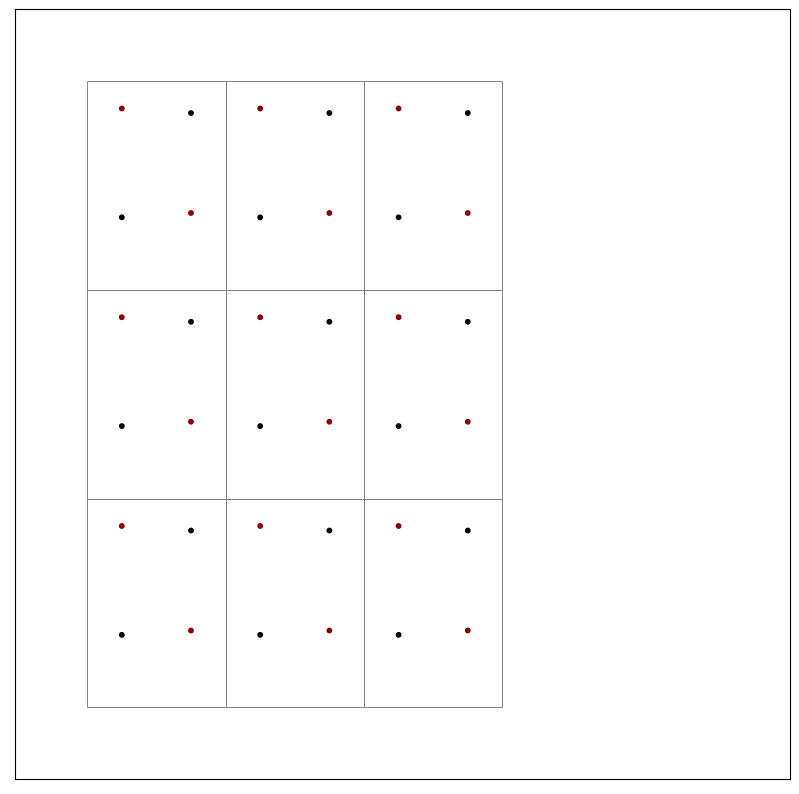

1

In [243]:
gcB.showNM(3,3)

In [194]:
Aa, Ab = gcA.u, gcA.v
Ba, Bb = gcB.u, gcB.v

In [47]:
def busca(Vs1,Vs2, th, rango=20, limDelta=0.5, show=True):
    (vectU,vectV) = Vs1
    (a2,b2) = Vs2
    lim = limDelta
    f1, f2 = 0, 0
    res = [[],[]]
    rmin = [0,0,0,0,0.0]
    rmin2 = [0,0,0,0,0.0]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(a2,th), rota(b2,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    mind1=100
    mind2=100
    for k in range(1,(2*rango)+1):
        for i in range(k+1):
            j = k-i
            if(i<(rango+1) and j<(rango+1)):
                # Buscando en b+
                a,b = i,-j
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                delta = dist((0,0),r1)/dist((0,0),r2)
                err = dist(r1,r2)*(abs(delta))
                if err<mind1:
                    mind1=err
                if (err<limDelta):
                    #print(1-delta)
                    if(abs(1-delta)<0.1):
                        res[0].append([[a,b],[round(c),round(d)],delta])
                        print(">{}°:({},{})-({},{}): Delta={}%".format(th,a,b,round(c),round(d),delta*100),":",dist(r1,r2))
                # Buscando en b-
                if j!=0:
                    a,b = i,j
                    c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                    d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                    r1 = sumaV(multV(a,vectU),multV(b,vectV))
                    r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                    delta = dist((0,0),r1)/dist((0,0),r2)
                    err = dist(r1,r2)*(abs(delta))
                    if err<mind2:
                        mind2=err
                    if (err<limDelta):
                        if(abs(1-delta)<0.1):
                            res[1].append([[a,b],[round(c),round(d)],delta])
                            print(">>{}°:({},{})-({},{}): Delta={}%".format(th,a,b,round(c),round(d),delta*100),":",dist(r1,r2))
    if (mind1+mind2)/2<0.5:
        #print("******")
        print("----------\n{}°:{}\n\tdelta1={}\n\tdelta2={}\n----------".format(th,(mind1+mind2)/2,mind1,mind2))
    return res, ((mind1+mind2)/2)

def dameP(r,theta):
    tmin=200
    angR=0.0
    resultado=""
    P=(1,0,0,1)
    for i in range(len(r[0])):
        for j in range(len(r[1])):
            [m,p] = r[0][i][0]
            [n,q] = r[1][j][0]
            tam = (m*q)-(n*p)
            if tam>0:
                print((m,p),(n,q),"det=",tam)
                if tam<tmin:
                    resultado="\nMejor P para Theta={}:\n|{}\t{}|\n|{}\t{}|\nDet={}".format(theta,m,n,p,q,tam)
                    P = (m,n,p,q)
                    tmin=tam
    print(resultado)
    return P

In [247]:
def rastrea(Vs1,Vs2, ran=15, delta=0.1):
    res = []
    datos = []
    for i in range(36000):
        th = i/100
        resi, erP = busca(Vs1,Vs2, th, rango=ran, limDelta=delta)
        if erP<=1:
            datos.append([th,erP])
        if resi[0] != []:
            if resi[1] != []:
                res.append([th,resi]) 
    return res, np.array(datos)

In [248]:
r, graf = rastrea((Aa,Ab),(Ba,Bb),delta=0.1)

----------
13.78°:0.4984052098701217
	delta1=0.4421450301999794
	delta2=0.554665389540264
----------
----------
13.79°:0.49609650632070157
	delta1=0.44045645821903506
	delta2=0.551736554422368
----------
----------
13.8°:0.49381705939054754
	delta1=0.43880231222712857
	delta2=0.5488318065539666
----------
----------
13.81°:0.49156725676858315
	delta1=0.437182983042461
	delta2=0.5459515304947052
----------
----------
13.82°:0.48934748734708955
	delta1=0.43559885900693857
	delta2=0.5430961156872405
----------
----------
13.83°:0.48715814101820576
	delta1=0.4340503256268001
	delta2=0.5402659564096114
----------
----------
13.84°:0.4849996084624906
	delta1=0.4325377652051477
	delta2=0.5374614517198334
----------
----------
13.85°:0.48287228092976414
	delta1=0.43106155646715216
	delta2=0.5346830053923761
----------
----------
13.86°:0.48077655001224984
	delta1=0.4296220741782539
	delta2=0.5319310258462457
----------
----------
13.87°:0.47871280741017375
	delta1=0.4282196887561612
	delta2=0.

----------
16.19°:0.3249319590222735
	delta1=0.2562796016777051
	delta2=0.39358431636684194
----------
----------
16.2°:0.32157784790987787
	delta1=0.2529163201293031
	delta2=0.3902393756904526
----------
----------
16.21°:0.31823271989004387
	delta1=0.2495570294415051
	delta2=0.38690841033858264
----------
----------
16.22°:0.314896838780786
	delta1=0.24620189307814133
	delta2=0.38359178448343073
----------
----------
16.23°:0.3115704783661516
	delta1=0.24285108332719713
	delta2=0.3802898734051061
----------
----------
16.24°:0.308253922861979
	delta1=0.2395047818883503
	delta2=0.37700306383560767
----------
----------
16.25°:0.3049474674084855
	delta1=0.23616318050662863
	delta2=0.37373175431034233
----------
----------
16.26°:0.3016514185917209
	delta1=0.23282648165634692
	delta2=0.37047635552709485
----------
----------
16.27°:0.2983660949959165
	delta1=0.2294948992798238
	delta2=0.36723729071200917
----------
----------
16.28°:0.29509182778906556
	delta1=0.22616865958587665
	delta

----------
17.44°:0.24821949075184546
	delta1=0.20587613306991598
	delta2=0.29056284843377495
----------
----------
17.45°:0.25117155689525217
	delta1=0.20916374847220098
	delta2=0.29317936531830335
----------
----------
17.46°:0.254143632983693
	delta1=0.2124584218198198
	delta2=0.2958288441475662
----------
----------
17.47°:0.2571351184269886
	delta1=0.2157598296884391
	delta2=0.2985104071655381
----------
----------
17.48°:0.2601454324678809
	delta1=0.21906766750693243
	delta2=0.30122319742882936
----------
----------
17.49°:0.26317401351477976
	delta1=0.2223816482481924
	delta2=0.30396637878136706
----------
----------
17.5°:0.26622031849946814
	delta1=0.22570150122359944
	delta2=0.30673913577533685
----------
----------
17.51°:0.26928382225786796
	delta1=0.22902697097203298
	delta2=0.3095406735437029
----------
----------
17.52°:0.27236401693241796
	delta1=0.23235781623528695
	delta2=0.3123702176295489
----------
----------
17.53°:0.27546041139469224
	delta1=0.2356938090124465
	d

----------
20.8°:0.21558747721986338
	delta1=0.31146724622589594
	delta2=0.11970770821383081
----------
----------
20.81°:0.21685490866003357
	delta1=0.31151757164160454
	delta2=0.12219224567846261
----------
----------
20.82°:0.2182532866506981
	delta1=0.31159259144254253
	delta2=0.12491398185885366
----------
----------
20.83°:0.21977502873284108
	delta1=0.31169228779568126
	delta2=0.1278577696700009
----------
----------
20.84°:0.22141263914423195
	delta1=0.31181663702867213
	delta2=0.13100864125979178
----------
----------
20.85°:0.22315881858801373
	delta1=0.3119656096578802
	delta2=0.1343520275181472
----------
----------
20.86°:0.22500654713782114
	delta1=0.3121391704232234
	delta2=0.1378739238524189
----------
----------
20.87°:0.22694914282973627
	delta1=0.31233727832974534
	delta2=0.14156100732972718
----------
----------
20.88°:0.22898029929625013
	delta1=0.31255988669572676
	delta2=0.1454007118967735
----------
----------
20.89°:0.23109410608438885
	delta1=0.312806943207304

>>23.2°:(7,3)-(8,0): Delta=99.98454038315151% : 0.09637756982316176
>>23.21°:(7,3)-(8,0): Delta=99.9845403831515% : 0.09104256583654742
>>23.22°:(7,3)-(8,0): Delta=99.9845403831515% : 0.08570841078585997
>>23.23°:(7,3)-(8,0): Delta=99.98454038315148% : 0.08037527387041737
>>23.24°:(7,3)-(8,0): Delta=99.9845403831515% : 0.07504337233896859
>>23.25°:(7,3)-(8,0): Delta=99.9845403831515% : 0.06971298983303961
>>23.26°:(7,3)-(8,0): Delta=99.9845403831515% : 0.06438450381588925
>>23.27°:(7,3)-(8,0): Delta=99.9845403831515% : 0.05905842780029233
>>23.28°:(7,3)-(8,0): Delta=99.9845403831515% : 0.05373547859059241
>>23.29°:(7,3)-(8,0): Delta=99.9845403831515% : 0.048416687673377874
>>23.3°:(7,3)-(8,0): Delta=99.9845403831515% : 0.04310359461224316
>>23.31°:(7,3)-(8,0): Delta=99.98454038315148% : 0.03779860240641332
>>23.32°:(7,3)-(8,0): Delta=99.9845403831515% : 0.03250567772681201
>>23.33°:(7,3)-(8,0): Delta=99.9845403831515% : 0.02723185821122031
>>23.34°:(7,3)-(8,0): Delta=99.9845403831515% 

----------
40.35°:0.47656868418854215
	delta1=0.4464460373649104
	delta2=0.5066913310121739
----------
----------
40.36°:0.4780757482462964
	delta1=0.44548981362270906
	delta2=0.5106616828698838
----------
----------
40.37°:0.4795972613267159
	delta1=0.4445337114557839
	delta2=0.5146608111976478
----------
----------
40.38°:0.48113289097399714
	delta1=0.44357773167949643
	delta2=0.5186880502684978
----------
----------
40.39°:0.4826823126887556
	delta1=0.4426218751160838
	delta2=0.5227427502614275
----------
----------
40.4°:0.48424520979549135
	delta1=0.44166614259473197
	delta2=0.5268242769962507
----------
----------
40.41°:0.48582127330617053
	delta1=0.44071053495164847
	delta2=0.5309320116606926
----------
----------
40.42°:0.48741020178057015
	delta1=0.4397550530301351
	delta2=0.5350653505310051
----------
----------
40.43°:0.4890117011840315
	delta1=0.43879969768066546
	delta2=0.5392237046873974
----------
----------
40.44°:0.49062548474316425
	delta1=0.4378444697609598
	delta2=

----------
41.68°:0.4246924515204128
	delta1=0.3207650803976252
	delta2=0.5286198226432004
----------
----------
41.69°:0.4267890495043706
	delta1=0.31983612686391927
	delta2=0.5337419721448219
----------
----------
41.7°:0.4289138878640535
	delta1=0.3189075085942778
	delta2=0.5389202671338291
----------
----------
41.71°:0.4310661665643233
	delta1=0.31797922855440286
	delta2=0.5441531045742437
----------
----------
41.72°:0.43324510783671566
	delta1=0.3170512897435562
	delta2=0.5494389259298752
----------
----------
41.73°:0.4354499558858189
	delta1=0.3161236951950262
	delta2=0.5547762165766117
----------
----------
41.74°:0.43767997655999563
	delta1=0.31519644797659196
	delta2=0.5601635051433993
----------
----------
41.75°:0.4399344569913742
	delta1=0.314269551190999
	delta2=0.5655993627917494
----------
----------
41.76°:0.442212705209836
	delta1=0.31334300797644377
	delta2=0.5710824024432283
----------
----------
41.77°:0.44451404973514536
	delta1=0.3124168215070613
	delta2=0.5766

----------
43.16°:0.3055636465632967
	delta1=0.18954177801289668
	delta2=0.4215855151136967
----------
----------
43.17°:0.3041823131431341
	delta1=0.18872796420837504
	delta2=0.41963666207789313
----------
----------
43.18°:0.3028019583937056
	delta1=0.1879157926118994
	delta2=0.4176881241755118
----------
----------
43.19°:0.3014225952653989
	delta1=0.1871052846334655
	delta2=0.4157399058973323
----------
----------
43.2°:0.3000442369145027
	delta1=0.18629646201131153
	delta2=0.41379201181769387
----------
----------
43.21°:0.2986668967067756
	delta1=0.18548934681712725
	delta2=0.4118444465964239
----------
----------
43.22°:0.2972905882210763
	delta1=0.18468396146132302
	delta2=0.4098972149808296
----------
----------
43.23°:0.29591532525307196
	delta1=0.18388032869837695
	delta2=0.40795032180776697
----------
----------
43.24°:0.2945411218189751
	delta1=0.18307847163223126
	delta2=0.406003772005719
----------
----------
43.25°:0.2931679921593786
	delta1=0.1822784137217643
	delta2=0

----------
44.35°:0.12557853865695673
	delta1=0.1137026238585016
	delta2=0.13745445345541188
----------
----------
44.36°:0.12447204587969588
	delta1=0.11336474846773391
	delta2=0.13557934329165786
----------
----------
44.37°:0.12337472379234693
	delta1=0.11303445575700756
	delta2=0.1337149918276863
----------
----------
44.38°:0.1222868339305764
	delta1=0.1127118123977101
	delta2=0.1318618554634427
----------
----------
44.39°:0.1212086490330773
	delta1=0.11239688427377573
	delta2=0.13002041379237889
----------
----------
44.4°:0.12014045363703463
	delta1=0.11208973642519618
	delta2=0.12819117084887308
----------
----------
44.41°:0.11908254470151414
	delta1=0.11179043299106432
	delta2=0.12637465641196394
----------
----------
44.42°:0.1180352322585807
	delta1=0.11149903715222212
	delta2=0.12457142736493927
----------
----------
44.43°:0.11699884009170189
	delta1=0.1112156110736286
	delta2=0.12278206910977518
----------
----------
44.44°:0.1159737064405133
	delta1=0.11094021584653957

----------
45.67°:0.1268191601249191
	delta1=0.1399854286792367
	delta2=0.11365289157060149
----------
----------
45.68°:0.12786977219102874
	delta1=0.1406257564182347
	delta2=0.11511378796382281
----------
----------
45.69°:0.12893008116424215
	delta1=0.1412700561097756
	delta2=0.1165901062187087
----------
----------
45.7°:0.12999977074571056
	delta1=0.1419182736371627
	delta2=0.11808126785425846
----------
----------
45.71°:0.13107853655478974
	delta1=0.14257035554170808
	delta2=0.11958671756787137
----------
----------
45.72°:0.1321660857495822
	delta1=0.14322624902236694
	delta2=0.12110592247679745
----------
----------
45.73°:0.13326213664337133
	delta1=0.14388590193492595
	delta2=0.12263837135181672
----------
----------
45.74°:0.13436641831983542
	delta1=0.14454926279075328
	delta2=0.12418357384891754
----------
----------
45.75°:0.13547867024954025
	delta1=0.14521628075514378
	delta2=0.12574105974393668
----------
----------
45.76°:0.13659864190980314
	delta1=0.145886905645298

----------
46.97°:0.2965505932146808
	delta1=0.243388413946514
	delta2=0.3497127724828476
----------
----------
46.98°:0.2979606038224901
	delta1=0.24427449586800049
	delta2=0.3516467117769798
----------
----------
46.99°:0.2993712616609418
	delta1=0.2451613339493913
	delta2=0.3535811893724923
----------
----------
47.0°:0.30078255820561794
	delta1=0.24604891998750258
	delta2=0.3555161964237333
----------
----------
47.01°:0.30219448508199254
	delta1=0.2469372458901205
	delta2=0.3574517242738646
----------
----------
47.02°:0.30360703406209616
	delta1=0.24782630367426872
	delta2=0.3593877644499236
----------
----------
47.03°:0.3050201970612433
	delta1=0.24871608546447932
	delta2=0.36132430865800724
----------
----------
47.04°:0.30643396613486923
	delta1=0.2496065834911223
	delta2=0.36326134877861616
----------
----------
47.05°:0.3078483334754499
	delta1=0.2504977900887391
	delta2=0.3651988768621606
----------
----------
47.06°:0.3092632914094885
	delta1=0.2513896976944209
	delta2=0.

----------
48.63°:0.4990099130245754
	delta1=0.39691177720975396
	delta2=0.6011080488393968
----------
----------
48.64°:0.49639054989727355
	delta1=0.39786059891937686
	delta2=0.5949205008751702
----------
----------
48.65°:0.49378656762441675
	delta1=0.39880959303538505
	delta2=0.5887635422134484
----------
----------
48.66°:0.49119845054652844
	delta1=0.3997587583011377
	delta2=0.5826381427919192
----------
----------
48.67°:0.488626701079305
	delta1=0.4007080934716081
	delta2=0.5765453086870019
----------
----------
48.68°:0.4860718404007588
	delta1=0.4016575973132482
	delta2=0.5704860834882693
----------
----------
48.69°:0.4835344091574243
	delta1=0.40260726860386026
	delta2=0.5644615497109883
----------
----------
48.7°:0.48101496818892786
	delta1=0.40355710613247175
	delta2=0.558472830245384
----------
----------
48.71°:0.47851409927011923
	delta1=0.40450710869920087
	delta2=0.5525210898410376
----------
----------
48.72°:0.47603240586953177
	delta1=0.40545727511513596
	delta2=

----------
50.19°:0.49925424172848526
	delta1=0.5464369530366646
	delta2=0.4520715304203059
----------
----------
50.2°:0.4977001811119468
	delta1=0.5474024662856078
	delta2=0.4479978959382858
----------
----------
50.21°:0.49616173447538087
	delta1=0.5483680427240991
	delta2=0.4439554262266626
----------
----------
50.22°:0.4946393312403333
	delta1=0.5493336819895935
	delta2=0.4399449804910731
----------
----------
50.23°:0.49313341316989745
	delta1=0.550299383722018
	delta2=0.43596744261777687
----------
----------
50.24°:0.4916444346092447
	delta1=0.5512651475637453
	delta2=0.43202372165474406
----------
----------
50.25°:0.49017286271569316
	delta1=0.5522309731595746
	delta2=0.4281147522718118
----------
----------
50.26°:0.48871917767634854
	delta1=0.5531968601567123
	delta2=0.4242414951959847
----------
----------
50.27°:0.4872838729110752
	delta1=0.5541628082047543
	delta2=0.42040493761739617
----------
----------
50.28°:0.48586745525845076
	delta1=0.5551288169556575
	delta2=0.4

----------
51.55°:0.4899590049297311
	delta1=0.6782056031432985
	delta2=0.3017124067161637
----------
----------
51.56°:0.49102308168705483
	delta1=0.6791771671582977
	delta2=0.302868996215812
----------
----------
51.57°:0.4921213885388299
	delta1=0.6801487612674892
	delta2=0.3040940158101706
----------
----------
51.58°:0.49325351364000375
	delta1=0.6811203853125559
	delta2=0.3053866419674516
----------
----------
51.59°:0.4944190295523202
	delta1=0.6820920391360337
	delta2=0.3067460199686067
----------
----------
51.6°:0.4956174945027364
	delta1=0.6830637225813075
	delta2=0.3081712664241652
----------
----------
51.61°:0.49684845364372154
	delta1=0.6840354354926084
	delta2=0.3096614717948347
----------
----------
51.62°:0.4981114403083053
	delta1=0.6850071777150024
	delta2=0.31121570290160816
----------
----------
51.63°:0.49940597725332836
	delta1=0.6859789490943873
	delta2=0.3128330054122695
----------
----------
63.9°:0.4985183641920916
	delta1=0.6965699385449373
	delta2=0.300466

----------
69.22°:0.17497354530956208
	delta1=0.17497354530956208
	delta2=0.17497354530956208
----------
----------
69.23°:0.17501703889387782
	delta1=0.17501703889387782
	delta2=0.17501703889387782
----------
----------
69.24°:0.17510564891316693
	delta1=0.17510564891316693
	delta2=0.17510564891316693
----------
----------
69.25°:0.17523930692517248
	delta1=0.17523930692517248
	delta2=0.17523930692517248
----------
----------
69.26°:0.17541790995418097
	delta1=0.17541790995418097
	delta2=0.17541790995418097
----------
----------
69.27°:0.17564132088614498
	delta1=0.17564132088614498
	delta2=0.17564132088614498
----------
----------
69.28°:0.17590936899163612
	delta1=0.17590936899163612
	delta2=0.17590936899163612
----------
----------
69.29°:0.17622185057205347
	delta1=0.17622185057205347
	delta2=0.17622185057205347
----------
----------
69.3°:0.17657852972343224
	delta1=0.17657852972343224
	delta2=0.17657852972343224
----------
----------
69.31°:0.17697913921124522
	delta1=0.17697913

----------
71.06°:0.49998114146563577
	delta1=0.5472078867031808
	delta2=0.45275439622809077
----------
----------
71.07°:0.49806311744543863
	delta1=0.5498715851697097
	delta2=0.44625464972116763
----------
----------
71.08°:0.4961489237777107
	delta1=0.5525367343804178
	delta2=0.4397611131750035
----------
----------
71.09°:0.4942386896815641
	delta1=0.5552033133626236
	delta2=0.43327406600050455
----------
----------
71.1°:0.49233255291917655
	delta1=0.557871301533111
	delta2=0.42679380430524205
----------
----------
71.11°:0.49043066041225747
	delta1=0.5605406786893877
	delta2=0.4203206421351272
----------
----------
71.12°:0.48853316891361814
	delta1=0.5632114250011465
	delta2=0.41385491282608977
----------
----------
71.13°:0.4866402457395031
	delta1=0.5658835210019929
	delta2=0.4073969704770133
----------
----------
71.14°:0.4847520695689721
	delta1=0.5685569475813549
	delta2=0.4009471915565893
----------
----------
71.15°:0.48286883131732206
	delta1=0.5712316859766097
	delta2=0

----------
72.67°:0.29573996879021147
	delta1=0.29573996879021147
	delta2=0.29573996879021147
----------
----------
72.68°:0.2938786598502182
	delta1=0.2938786598502182
	delta2=0.2938786598502182
----------
----------
72.69°:0.29204875222631177
	delta1=0.29204875222631177
	delta2=0.29204875222631177
----------
----------
72.7°:0.2902508398910192
	delta1=0.2902508398910192
	delta2=0.2902508398910192
----------
----------
72.71°:0.2884855211076452
	delta1=0.2884855211076452
	delta2=0.2884855211076452
----------
----------
72.72°:0.2867533978909139
	delta1=0.2867533978909139
	delta2=0.2867533978909139
----------
----------
72.73°:0.285055075428413
	delta1=0.285055075428413
	delta2=0.285055075428413
----------
----------
72.74°:0.28339116146216914
	delta1=0.28339116146216914
	delta2=0.28339116146216914
----------
----------
72.75°:0.2817622656299653
	delta1=0.2817622656299653
	delta2=0.2817622656299653
----------
----------
72.76°:0.2801689987662785
	delta1=0.2801689987662785
	delta2=0.280

----------
73.9°:0.2998314969093293
	delta1=0.3769261883364762
	delta2=0.22273680548218247
----------
----------
73.91°:0.3028398834115172
	delta1=0.3795840297571465
	delta2=0.2260957370658879
----------
----------
73.92°:0.30586758341378656
	delta1=0.38225644202225534
	delta2=0.22947872480531775
----------
----------
73.93°:0.30891392091696146
	delta1=0.38494312158337246
	delta2=0.2328847202505505
----------
----------
73.94°:0.3119782500873225
	delta1=0.3876437717085168
	delta2=0.23631272846612822
----------
----------
73.95°:0.315059953760043
	delta1=0.39035810235489693
	delta2=0.23976180516518902
----------
----------
73.96°:0.31815844200937693
	delta1=0.39308583004117403
	delta2=0.24323105397757985
----------
----------
73.97°:0.3212731507850479
	delta1=0.3958266777194727
	delta2=0.2467196238506231
----------
----------
73.98°:0.3244035406136826
	delta1=0.39858037464742224
	delta2=0.25022670657994295
----------
----------
73.99°:0.3275490953638757
	delta1=0.40134665626045385
	delt

----------
77.41°:0.4999684787222504
	delta1=0.6001552308050669
	delta2=0.3997817266394339
----------
----------
77.42°:0.4985086142864622
	delta1=0.5994735769203755
	delta2=0.39754365165254885
----------
----------
77.43°:0.49708007081976024
	delta1=0.5987950524349468
	delta2=0.39536508920457364
----------
----------
77.44°:0.4956833482349754
	delta1=0.5981196680197326
	delta2=0.39324702845021825
----------
----------
77.45°:0.49431894327044773
	delta1=0.5974474343444209
	delta2=0.3911904521964745
----------
----------
77.46°:0.49298734863331206
	delta1=0.5967783620768571
	delta2=0.3891963351897671
----------
----------
77.47°:0.49168905211234154
	delta1=0.5961124618824785
	delta2=0.3872656423422046
----------
----------
77.48°:0.4904245356625848
	delta1=0.5954497444237358
	delta2=0.3853993269014338
----------
----------
77.49°:0.48919427446438557
	delta1=0.5947902203594952
	delta2=0.38359832856927584
----------
----------
77.5°:0.4879987359597835
	delta1=0.5941339003444548
	delta2=0.

----------
78.73°:0.49861795979408374
	delta1=0.5410091494739669
	delta2=0.45622677011420054
----------
----------
78.74°:0.49675193133290363
	delta1=0.5408240907448457
	delta2=0.4526797719209615
----------
----------
78.75°:0.49491407958654243
	delta1=0.5406432960043855
	delta2=0.4491848631686993
----------
----------
78.76°:0.49310501937319096
	delta1=0.5404667695372127
	delta2=0.44574326920916924
----------
----------
80.33°:0.49928810945971136
	delta1=0.2583337997374951
	delta2=0.7402424191819277
----------
----------
80.34°:0.49787831736707056
	delta1=0.25620089795500905
	delta2=0.739555736779132
----------
----------
80.35°:0.49646935476646314
	delta1=0.2540695886149496
	delta2=0.7388691209179767
----------
----------
80.36°:0.49506124200119583
	delta1=0.2519399121973076
	delta2=0.7381825718050841
----------
----------
80.37°:0.49365400008909266
	delta1=0.24981191053037483
	delta2=0.7374960896478104
----------
----------
80.38°:0.4922476507500654
	delta1=0.24768562684588757
	delt

----------
81.55°:0.3671888744099761
	delta1=0.0773512861271586
	delta2=0.6570264626927936
----------
>81.56°:(1,-3)-(-3,-1): Delta=99.42488723602966% : 0.07851992460900764
----------
81.56°:0.3672090087294686
	delta1=0.07806834650032135
	delta2=0.6563496709586158
----------
>81.57°:(1,-3)-(-3,-1): Delta=99.42488723602966% : 0.07929780162456028
----------
81.57°:0.3672573636604578
	delta1=0.07884174984586956
	delta2=0.655672977475046
----------
>81.58°:(1,-3)-(-3,-1): Delta=99.42488723602966% : 0.08013069715905674
----------
81.58°:0.36733311892954057
	delta1=0.0796698552918366
	delta2=0.6549963825672446
----------
>81.59°:(1,-3)-(-3,-1): Delta=99.42488723602966% : 0.08101691434931814
----------
81.59°:0.36743543114778365
	delta1=0.0805509757339203
	delta2=0.654319886561647
----------
>81.6°:(1,-3)-(-3,-1): Delta=99.42488723602966% : 0.08195472340629513
----------
81.6°:0.3675634405586421
	delta1=0.08148339133130894
	delta2=0.6536434897859753
----------
>81.61°:(1,-3)-(-3,-1): Delta=99

----------
82.96°:0.4428987505457964
	delta1=0.32305709448093556
	delta2=0.5627404066106573
----------
----------
82.97°:0.442342558186538
	delta1=0.3226037421313333
	delta2=0.5620813742417428
----------
----------
82.98°:0.4417995361648912
	delta1=0.32217657034033453
	delta2=0.5614225019894479
----------
----------
82.99°:0.4412697369134474
	delta1=0.32177568338862583
	delta2=0.560763790438269
----------
----------
83.0°:0.4407532099098907
	delta1=0.3214011796444973
	delta2=0.5601052401752841
----------
----------
83.01°:0.44025000161820743
	delta1=0.32105315144624713
	delta2=0.5594468517901677
----------
----------
83.02°:0.43976015543305874
	delta1=0.32073168499091165
	delta2=0.5587886258752058
----------
----------
83.03°:0.4392837116274372
	delta1=0.320436860229568
	delta2=0.5581305630253064
----------
----------
83.04°:0.4388207073037945
	delta1=0.3201687507695733
	delta2=0.5574726638380157
----------
----------
83.05°:0.43837117634874523
	delta1=0.31992742378395506
	delta2=0.556

----------
84.4°:0.469825015926991
	delta1=0.469825015926991
	delta2=0.469825015926991
----------
----------
84.41°:0.46919659273559505
	delta1=0.46919659273559505
	delta2=0.46919659273559505
----------
----------
84.42°:0.4685684486069949
	delta1=0.4685684486069949
	delta2=0.4685684486069949
----------
----------
84.43°:0.46794058468416866
	delta1=0.46794058468416866
	delta2=0.46794058468416866
----------
----------
84.44°:0.46731300211570526
	delta1=0.46731300211570526
	delta2=0.46731300211570526
----------
----------
84.45°:0.4666857020558241
	delta1=0.4666857020558241
	delta2=0.4666857020558241
----------
----------
84.46°:0.4660586856644156
	delta1=0.4660586856644156
	delta2=0.4660586856644156
----------
----------
84.47°:0.46543195410706906
	delta1=0.46543195410706906
	delta2=0.46543195410706906
----------
----------
84.48°:0.464805508555101
	delta1=0.464805508555101
	delta2=0.464805508555101
----------
----------
84.49°:0.46417935018559336
	delta1=0.46417935018559336
	delta2=0.4

----------
85.64°:0.3944434671851549
	delta1=0.3944434671851549
	delta2=0.3944434671851549
----------
----------
85.65°:0.39386043253958974
	delta1=0.39386043253958974
	delta2=0.39386043253958974
----------
----------
85.66°:0.3932778727153142
	delta1=0.3932778727153142
	delta2=0.3932778727153142
----------
----------
85.67°:0.39269578984328746
	delta1=0.39269578984328746
	delta2=0.39269578984328746
----------
----------
85.68°:0.3921141860653514
	delta1=0.3921141860653514
	delta2=0.3921141860653514
----------
----------
85.69°:0.39153306353427486
	delta1=0.39153306353427486
	delta2=0.39153306353427486
----------
----------
85.7°:0.3909524244138154
	delta1=0.3909524244138154
	delta2=0.3909524244138154
----------
----------
85.71°:0.3903722708787749
	delta1=0.3903722708787749
	delta2=0.3903722708787749
----------
----------
85.72°:0.38979260511504527
	delta1=0.38979260511504527
	delta2=0.38979260511504527
----------
----------
85.73°:0.38921342931967917
	delta1=0.38921342931967917
	delt

----------
87.02°:0.31956587250926555
	delta1=0.31956587250926555
	delta2=0.31956587250926555
----------
----------
87.03°:0.31907399845275153
	delta1=0.31907399845275153
	delta2=0.31907399845275153
----------
----------
87.04°:0.3185830206724485
	delta1=0.3185830206724485
	delta2=0.3185830206724485
----------
----------
87.05°:0.3180929433335659
	delta1=0.3180929433335659
	delta2=0.3180929433335659
----------
----------
87.06°:0.31760377061933454
	delta1=0.31760377061933454
	delta2=0.31760377061933454
----------
----------
87.07°:0.31711550673103106
	delta1=0.31711550673103106
	delta2=0.31711550673103106
----------
----------
87.08°:0.3166281558879901
	delta1=0.3166281558879901
	delta2=0.3166281558879901
----------
----------
87.09°:0.31614172232762927
	delta1=0.31614172232762927
	delta2=0.31614172232762927
----------
----------
87.1°:0.31565621030546276
	delta1=0.31565621030546276
	delta2=0.31565621030546276
----------
----------
87.11°:0.3151716240951166
	delta1=0.3151716240951166
	

----------
88.3°:0.26550189066930474
	delta1=0.26550189066930474
	delta2=0.26550189066930474
----------
----------
88.31°:0.26516452344256786
	delta1=0.26516452344256786
	delta2=0.26516452344256786
----------
----------
88.32°:0.26482872002793223
	delta1=0.26482872002793223
	delta2=0.26482872002793223
----------
----------
88.33°:0.2644944863919143
	delta1=0.2644944863919143
	delta2=0.2644944863919143
----------
----------
88.34°:0.26416182850325526
	delta1=0.26416182850325526
	delta2=0.26416182850325526
----------
----------
88.35°:0.2638307523325735
	delta1=0.2638307523325735
	delta2=0.2638307523325735
----------
----------
88.36°:0.26350126385202016
	delta1=0.26350126385202016
	delta2=0.26350126385202016
----------
----------
88.37°:0.26317336903493455
	delta1=0.26317336903493455
	delta2=0.26317336903493455
----------
----------
88.38°:0.2628470738554823
	delta1=0.2628470738554823
	delta2=0.2628470738554823
----------
----------
88.39°:0.26252238428830194
	delta1=0.26252238428830194

----------
89.67°:0.2362264776585752
	delta1=0.2362264776585752
	delta2=0.2362264776585752
----------
----------
89.68°:0.23615379891422048
	delta1=0.23615379891422048
	delta2=0.23615379891422048
----------
----------
89.69°:0.23608333506379184
	delta1=0.23608333506379184
	delta2=0.23608333506379184
----------
----------
89.7°:0.2360150880932493
	delta1=0.2360150880932493
	delta2=0.2360150880932493
----------
----------
89.71°:0.23594905992833368
	delta1=0.23594905992833368
	delta2=0.23594905992833368
----------
----------
89.72°:0.23588525243429753
	delta1=0.23588525243429753
	delta2=0.23588525243429753
----------
----------
89.73°:0.23582366741564664
	delta1=0.23582366741564664
	delta2=0.23582366741564664
----------
----------
89.74°:0.23576430661588418
	delta1=0.23576430661588418
	delta2=0.23576430661588418
----------
----------
89.75°:0.235707171717269
	delta1=0.235707171717269
	delta2=0.235707171717269
----------
----------
89.76°:0.23565226434058156
	delta1=0.23565226434058156
	d

----------
90.8°:0.2420910973069337
	delta1=0.2420910973069337
	delta2=0.2420910973069337
----------
----------
90.81°:0.24226666050020534
	delta1=0.24226666050020534
	delta2=0.24226666050020534
----------
----------
90.82°:0.24244427494594514
	delta1=0.24244427494594514
	delta2=0.24244427494594514
----------
----------
90.83°:0.2426239361338532
	delta1=0.2426239361338532
	delta2=0.2426239361338532
----------
----------
90.84°:0.24280563951507286
	delta1=0.24280563951507286
	delta2=0.24280563951507286
----------
----------
90.85°:0.24298938050272148
	delta1=0.24298938050272148
	delta2=0.24298938050272148
----------
----------
90.86°:0.24317515447241722
	delta1=0.24317515447241722
	delta2=0.24317515447241722
----------
----------
90.87°:0.243362956762805
	delta1=0.243362956762805
	delta2=0.243362956762805
----------
----------
90.88°:0.2435527826760876
	delta1=0.2435527826760876
	delta2=0.2435527826760876
----------
----------
90.89°:0.24374462747855802
	delta1=0.24374462747855802
	delt

----------
91.88°:0.2718351326686111
	delta1=0.2718351326686111
	delta2=0.2718351326686111
----------
----------
91.89°:0.2722010840026357
	delta1=0.2722010840026357
	delta2=0.2722010840026357
----------
----------
91.9°:0.27256848077471474
	delta1=0.27256848077471474
	delta2=0.27256848077471474
----------
----------
91.91°:0.27293731713663355
	delta1=0.27293731713663355
	delta2=0.27293731713663355
----------
----------
91.92°:0.2733075872488771
	delta1=0.2733075872488771
	delta2=0.2733075872488771
----------
----------
91.93°:0.27367928528087904
	delta1=0.27367928528087904
	delta2=0.27367928528087904
----------
----------
91.94°:0.2740524054112643
	delta1=0.2740524054112643
	delta2=0.2740524054112643
----------
----------
91.95°:0.2744269418280935
	delta1=0.2744269418280935
	delta2=0.2744269418280935
----------
----------
91.96°:0.2748028887290925
	delta1=0.2748028887290925
	delta2=0.2748028887290925
----------
----------
91.97°:0.27518024032188926
	delta1=0.27518024032188926
	delta2=

----------
93.3°:0.3357550852177134
	delta1=0.3357550852177134
	delta2=0.3357550852177134
----------
----------
93.31°:0.33627431603616514
	delta1=0.33627431603616514
	delta2=0.33627431603616514
----------
----------
93.32°:0.3367943120279691
	delta1=0.3367943120279691
	delta2=0.3367943120279691
----------
----------
93.33°:0.3373150696386118
	delta1=0.3373150696386118
	delta2=0.3373150696386118
----------
----------
93.34°:0.3378365853302757
	delta1=0.3378365853302757
	delta2=0.3378365853302757
----------
----------
93.35°:0.33835885558180145
	delta1=0.33835885558180145
	delta2=0.33835885558180145
----------
----------
93.36°:0.3388818768886276
	delta1=0.3388818768886276
	delta2=0.3388818768886276
----------
----------
93.37°:0.33940564576275073
	delta1=0.33940564576275073
	delta2=0.33940564576275073
----------
----------
93.38°:0.33993015873266896
	delta1=0.33993015873266896
	delta2=0.33993015873266896
----------
----------
93.39°:0.3404554123433295
	delta1=0.3404554123433295
	delta2

----------
94.71°:0.41513303171276034
	delta1=0.41513303171276034
	delta2=0.41513303171276034
----------
----------
94.72°:0.41573182808345066
	delta1=0.41573182808345066
	delta2=0.41573182808345066
----------
----------
94.73°:0.4163310275931729
	delta1=0.4163310275931729
	delta2=0.4163310275931729
----------
----------
94.74°:0.4169306284855772
	delta1=0.4169306284855772
	delta2=0.4169306284855772
----------
----------
94.75°:0.41753062901320626
	delta1=0.41753062901320626
	delta2=0.41753062901320626
----------
----------
94.76°:0.41813102743744224
	delta1=0.41813102743744224
	delta2=0.41813102743744224
----------
----------
94.77°:0.4187318220284613
	delta1=0.4187318220284613
	delta2=0.4187318220284613
----------
----------
94.78°:0.41933301106519455
	delta1=0.41933301106519455
	delta2=0.41933301106519455
----------
----------
94.79°:0.41993459283527157
	delta1=0.41993459283527157
	delta2=0.41993459283527157
----------
----------
94.8°:0.42053656563497754
	delta1=0.42053656563497754

----------
95.51°:0.464179350185593
	delta1=0.464179350185593
	delta2=0.464179350185593
----------
----------
95.52°:0.4648055085551004
	delta1=0.4648055085551004
	delta2=0.4648055085551004
----------
----------
95.53°:0.4654319541070683
	delta1=0.4654319541070683
	delta2=0.4654319541070683
----------
----------
95.54°:0.46605868566441516
	delta1=0.46605868566441516
	delta2=0.46605868566441516
----------
----------
95.55°:0.4666857020558226
	delta1=0.4666857020558226
	delta2=0.4666857020558226
----------
----------
95.56°:0.4673130021157045
	delta1=0.4673130021157045
	delta2=0.4673130021157045
----------
----------
95.57°:0.46794058468416905
	delta1=0.46794058468416905
	delta2=0.46794058468416905
----------
----------
95.58°:0.4685684486069952
	delta1=0.4685684486069952
	delta2=0.4685684486069952
----------
----------
95.59°:0.46919659273559533
	delta1=0.46919659273559533
	delta2=0.46919659273559533
----------
----------
95.6°:0.4698250159269906
	delta1=0.4698250159269906
	delta2=0.469

----------
96.36°:0.4351051856790408
	delta1=0.5183224973035463
	delta2=0.35188787405453525
----------
----------
96.37°:0.4348129803610348
	delta1=0.5189693746331256
	delta2=0.35065658608894396
----------
----------
96.38°:0.4345310704976491
	delta1=0.5196164568759977
	delta2=0.34944568411930055
----------
----------
96.39°:0.43425956204006444
	delta1=0.5202637432479023
	delta2=0.34825538083222657
----------
----------
96.4°:0.4339985605785186
	delta1=0.5209112329682013
	delta2=0.34708588818883596
----------
----------
96.41°:0.4337481712726257
	delta1=0.5215589252598678
	delta2=0.34593741728538363
----------
----------
96.42°:0.4335084987800017
	delta1=0.5222068193494632
	delta2=0.34481017821054016
----------
----------
96.43°:0.43327964718328205
	delta1=0.5228549144671146
	delta2=0.3437043798994494
----------
----------
96.44°:0.4330617199155598
	delta1=0.5235032098465018
	delta2=0.34262022998461783
----------
----------
96.45°:0.4328548196843577
	delta1=0.5241517047248325
	delta2=0

----------
97.65°:0.4090963443448186
	delta1=0.6032224870468756
	delta2=0.21497020164276157
----------
----------
97.66°:0.40838523739506477
	delta1=0.603890404251406
	delta2=0.21288007053872351
----------
----------
97.67°:0.40767558329164183
	delta1=0.6045584494185224
	delta2=0.2107927171647612
----------
----------
97.68°:0.40696742351616355
	delta1=0.6052266221041781
	delta2=0.20870822492814894
----------
----------
97.69°:0.4062608011753809
	delta1=0.6058949218661732
	delta2=0.20662668048458857
----------
----------
97.7°:0.405555761077769
	delta1=0.6065633482641554
	delta2=0.20454817389138255
----------
----------
97.71°:0.40485234981430035
	delta1=0.6072319008596021
	delta2=0.20247279876899857
----------
----------
97.72°:0.4041506158436131
	delta1=0.6079005792158171
	delta2=0.2004006524714091
----------
----------
97.73°:0.40345060958187084
	delta1=0.6085693828979185
	delta2=0.1983318362658232
----------
----------
97.74°:0.4027523834975862
	delta1=0.6092383114728268
	delta2=0.

----------
98.83°:0.3890812130196865
	delta1=0.6828142639356116
	delta2=0.09534816210376142
----------
>>98.84°:(1,3)-(3,-1): Delta=99.42488723602966% : 0.0973394491058167
----------
98.84°:0.39013714213908135
	delta1=0.683494646768532
	delta2=0.09677963750963074
----------
>>98.85°:(1,3)-(3,-1): Delta=99.42488723602966% : 0.09880895657952182
----------
98.85°:0.39120790474205724
	delta1=0.6841751158258274
	delta2=0.0982406936582871
----------
>>98.86°:(1,3)-(3,-1): Delta=99.42488723602966% : 0.10030690826365117
----------
98.86°:0.39229285063043434
	delta1=0.6848556708297858
	delta2=0.0997300304310829
----------
----------
98.87°:0.393391355634638
	delta1=0.6855363115037387
	delta2=0.10124639976553733
----------
----------
98.88°:0.39450282140867954
	delta1=0.6862170375720639
	delta2=0.10278860524529526
----------
----------
98.89°:0.39562667507080107
	delta1=0.6868978487601725
	delta2=0.10435550138142964
----------
----------
98.9°:0.39676236871728043
	delta1=0.6875787447945116
	delt

----------
101.24°:0.4931050193731897
	delta1=0.4457432692091664
	delta2=0.540466769537213
----------
----------
101.25°:0.4949140795865423
	delta1=0.4491848631687003
	delta2=0.5406432960043843
----------
----------
101.26°:0.4967519313329022
	delta1=0.45267977192095865
	delta2=0.5408240907448457
----------
----------
101.27°:0.4986179597940824
	delta1=0.4562267701141976
	delta2=0.5410091494739673
----------
----------
101.8°:0.4990080996423216
	delta1=0.441242294269577
	delta2=0.5567739050150662
----------
----------
101.81°:0.49769495088354965
	delta1=0.43820946337789335
	delta2=0.557180438389206
----------
----------
101.82°:0.49640596879175675
	delta1=0.43522106690553297
	delta2=0.5575908706779805
----------
----------
101.83°:0.49514160987720524
	delta1=0.43227802648887154
	delta2=0.558005193265539
----------
----------
101.84°:0.4939023361650789
	delta1=0.42938127485010746
	delta2=0.5584233974800503
----------
----------
101.85°:0.49268861488598686
	delta1=0.4265317551774783
	del

----------
103.78°:0.49300734702531157
	delta1=0.3357118418621722
	delta2=0.650302852188451
----------
----------
103.79°:0.4912829272064061
	delta1=0.33344034731338257
	delta2=0.6491255070994296
----------
----------
103.8°:0.48959730320175193
	delta1=0.33122013549050355
	delta2=0.6479744709130003
----------
----------
103.81°:0.48795106431626656
	delta1=0.3290522445221775
	delta2=0.6468498841103556
----------
----------
103.82°:0.48634480009575964
	delta1=0.32693771527963905
	delta2=0.6457518849118802
----------
----------
103.83°:0.484779099487906
	delta1=0.32487758977523823
	delta2=0.6446806092005737
----------
----------
103.84°:0.48325454995330774
	delta1=0.32287290946079633
	delta2=0.6436361904458191
----------
----------
103.85°:0.48177173652745864
	delta1=0.3209247134272542
	delta2=0.6426187596276631
----------
----------
103.86°:0.4803312408346568
	delta1=0.3190340365077433
	delta2=0.6416284451615702
----------
----------
103.87°:0.4789336400555826
	delta1=0.3172019072873213


----------
106.89°:0.22137104359048973
	delta1=0.19158685646236295
	delta2=0.2511552307186165
----------
----------
106.9°:0.22291055446836117
	delta1=0.19464426139731592
	delta2=0.25117684753940644
----------
----------
106.91°:0.22449406375998088
	delta1=0.19773937099050884
	delta2=0.2512487565294529
----------
----------
106.92°:0.22612067838398225
	delta1=0.20087044224222575
	delta2=0.25137091452573873
----------
----------
106.93°:0.2277895339064252
	delta1=0.20403581949619756
	delta2=0.25154324831665287
----------
----------
106.94°:0.22949979275629634
	delta1=0.20723393065173398
	delta2=0.25176565486085867
----------
----------
106.95°:0.23125064249073374
	delta1=0.2104632833873267
	delta2=0.2520380015941408
----------
----------
106.96°:0.23304129412501146
	delta1=0.2137224614279184
	delta2=0.2523601268221045
----------
----------
106.97°:0.23487098053894057
	delta1=0.21701012088186675
	delta2=0.25273184019601436
----------
----------
106.98°:0.23673895496812958
	delta1=0.22032

----------
108.32°:0.413831080737549
	delta1=0.11318282478087065
	delta2=0.7144793366942274
----------
----------
108.33°:0.4132495267743194
	delta1=0.11474404257440698
	delta2=0.7117550109742319
----------
----------
108.34°:0.41285091259994144
	delta1=0.11667047450706898
	delta2=0.7090313506928139
----------
----------
108.35°:0.41262637018557785
	delta1=0.1189443767395572
	delta2=0.7063083636315985
----------
----------
108.36°:0.4125661534538054
	delta1=0.12154624921720503
	delta2=0.7035860576904057
----------
----------
108.37°:0.41265998238639445
	delta1=0.12445552388330132
	delta2=0.7008644408894876
----------
----------
108.38°:0.41289735295704477
	delta1=0.12765118454228913
	delta2=0.6981435213718005
----------
----------
108.39°:0.413267799761159
	delta1=0.13111229211702274
	delta2=0.6954233074052952
----------
----------
108.4°:0.4137611057447119
	delta1=0.134818404104105
	delta2=0.6927038073853189
----------
----------
108.41°:0.4143674594374381
	delta1=0.13874988903784571


----------
109.63°:0.27966091122193953
	delta1=0.19061451662136816
	delta2=0.3687073058225109
----------
----------
109.64°:0.27808152274892917
	delta1=0.1899274040345144
	delta2=0.36623564146334386
----------
----------
109.65°:0.276536414396414
	delta1=0.18930393008148932
	delta2=0.3637688987113387
----------
----------
109.66°:0.2750259519371202
	delta1=0.18874472542834883
	delta2=0.3613071784458916
----------
----------
109.67°:0.27355047347090444
	delta1=0.18825036283605
	delta2=0.3588505841057588
----------
----------
109.68°:0.2721102880467281
	delta1=0.18782135433070235
	delta2=0.3563992217627538
----------
----------
109.69°:0.27070567441150784
	delta1=0.18745814862545196
	delta2=0.3539532001975637
----------
----------
109.7°:0.26933687990062105
	delta1=0.18716112882339017
	delta2=0.35151263097785196
----------
----------
109.71°:0.26800411948347946
	delta1=0.1869306104283038
	delta2=0.3490776285386551
----------
----------
109.72°:0.26670757497605024
	delta1=0.18676683968699

----------
110.98°:0.1833840745820249
	delta1=0.1833840745820249
	delta2=0.1833840745820249
----------
----------
110.99°:0.18424532158789947
	delta1=0.18424532158789947
	delta2=0.18424532158789947
----------
----------
111.0°:0.185145240759509
	delta1=0.185145240759509
	delta2=0.185145240759509
----------
----------
111.01°:0.18608327100194458
	delta1=0.18608327100194458
	delta2=0.18608327100194458
----------
----------
111.02°:0.18705883894935357
	delta1=0.18705883894935357
	delta2=0.18705883894935357
----------
----------
111.03°:0.1880713604239114
	delta1=0.1880713604239114
	delta2=0.1880713604239114
----------
----------
111.04°:0.18912024186499257
	delta1=0.18912024186499257
	delta2=0.18912024186499257
----------
----------
111.05°:0.1902048817227016
	delta1=0.1902048817227016
	delta2=0.1902048817227016
----------
----------
111.06°:0.19132467181048313
	delta1=0.19132467181048313
	delta2=0.19132467181048313
----------
----------
111.07°:0.19247899861227125
	delta1=0.1924789986122

----------
115.45°:0.49838190100239416
	delta1=0.25913965929521443
	delta2=0.7376241427095739
----------
----------
115.46°:0.49605705390914234
	delta1=0.25528839009409937
	delta2=0.7368257177241853
----------
----------
115.47°:0.49377776517926164
	delta1=0.2515233427765291
	delta2=0.7360321875819942
----------
----------
115.48°:0.4915460075087155
	delta1=0.24784844686157234
	delta2=0.7352435681558587
----------
----------
115.49°:0.48936382332233286
	delta1=0.24426777135631839
	delta2=0.7344598752883473
----------
----------
115.5°:0.487233322300306
	delta1=0.2407855198101044
	delta2=0.7336811247905076
----------
----------
115.51°:0.4851566779172344
	delta1=0.23740602339382497
	delta2=0.7329073324406438
----------
----------
115.52°:0.4831361228769637
	delta1=0.2341337317708591
	delta2=0.7321385139830683
----------
----------
115.53°:0.4811739433284642
	delta1=0.23097320153008444
	delta2=0.731374685126844
----------
----------
115.54°:0.4792724717540869
	delta1=0.22792908196362585


----------
129.6°:0.4705469545394213
	delta1=0.3743683758335516
	delta2=0.566725533245291
----------
----------
129.61°:0.47169216543832776
	delta1=0.37762550850355503
	delta2=0.5657588223731005
----------
----------
129.62°:0.4728634237258982
	delta1=0.38093467924713637
	delta2=0.5647921682046599
----------
----------
129.63°:0.474060057362265
	delta1=0.3842945436633986
	delta2=0.5638255710611313
----------
----------
129.64°:0.47528140748804704
	delta1=0.3877037837102674
	delta2=0.5628590312658267
----------
----------
129.65°:0.4765268287015718
	delta1=0.39116110825894473
	delta2=0.561892549144199
----------
----------
129.66°:0.4777956892749329
	delta1=0.3946652535259724
	delta2=0.5609261250238934
----------
----------
129.67°:0.4790873713137296
	delta1=0.3982149833927349
	delta2=0.5599597592347243
----------
----------
129.68°:0.48040127086475093
	delta1=0.401809089620766
	delta2=0.5589934521087359
----------
----------
129.69°:0.4817367979762241
	delta1=0.4054463919722612
	delta2

----------
131.62°:0.4993211088013141
	delta1=0.625391020836113
	delta2=0.37325119676651514
----------
----------
131.63°:0.4978656872406098
	delta1=0.6234240343304784
	delta2=0.3723073401507412
----------
----------
131.64°:0.49641041747749415
	delta1=0.6214571401597293
	delta2=0.37136369479525894
----------
----------
131.65°:0.4949553008035076
	delta1=0.6194903392635424
	delta2=0.3704202623434728
----------
----------
131.66°:0.4935003385242537
	delta1=0.6175236325933678
	delta2=0.36947704445513957
----------
----------
131.67°:0.4920455319595537
	delta1=0.615557021112559
	delta2=0.36853404280654833
----------
----------
131.68°:0.49059088244364335
	delta1=0.6135905057965634
	delta2=0.3675912590907233
----------
----------
131.69°:0.48913639132540765
	delta1=0.6116240876331681
	delta2=0.36664869501764724
----------
----------
131.7°:0.48768205996854813
	delta1=0.6096577676226446
	delta2=0.3657063523144517
----------
----------
131.71°:0.48622788975178854
	delta1=0.6076915467779495
	

----------
133.47°:0.23531443107009195
	delta1=0.26533167463234997
	delta2=0.20529718750783393
----------
----------
133.48°:0.23394569083363242
	delta1=0.2634355536225485
	delta2=0.20445582804471635
----------
----------
133.49°:0.23257823855873638
	delta1=0.26154071733284123
	delta2=0.2036157597846315
----------
----------
133.5°:0.2312120963746055
	delta1=0.2596471939482216
	delta2=0.2027769988009894
----------
----------
133.51°:0.229847286935291
	delta1=0.25775501246166277
	delta2=0.20193956140891922
----------
----------
133.52°:0.2284838334358512
	delta1=0.2558642027024718
	delta2=0.2011034641692306
----------
----------
133.53°:0.2271217596291895
	delta1=0.2539747953659071
	delta2=0.20026872389247194
----------
----------
133.54°:0.22576108984345886
	delta1=0.25208682204391264
	delta2=0.19943535764300507
----------
----------
133.55°:0.22440184900019622
	delta1=0.250200315257213
	delta2=0.19860338274317949
----------
----------
133.56°:0.2230440626331473
	delta1=0.2483153084887

----------
134.93°:0.0982017859142825
	delta1=0.08518558162963003
	delta2=0.11121799019893498
----------
>134.94°:(1,-3)-(-3,1): Delta=99.42488723602966% : 0.08515857713527406
>134.94°:(2,-2)-(-3,0): Delta=99.32157849666342% : 0.08662318428167909
----------
134.94°:0.09780567281772451
	delta1=0.08466881928855358
	delta2=0.11094252634689543
----------
>134.95°:(1,-3)-(-3,1): Delta=99.42488723602968% : 0.08407248116509633
>134.95°:(2,-2)-(-3,0): Delta=99.32157849666342% : 0.08751610992918286
----------
134.95°:0.09713206119770262
	delta1=0.08358896959492931
	delta2=0.11067515280047595
----------
>134.96°:(1,-3)-(-3,1): Delta=99.42488723602968% : 0.0830325562527738
>134.96°:(2,-2)-(-3,0): Delta=99.32157849666339% : 0.08844509702828855
----------
134.96°:0.09648547688185391
	delta1=0.08255502542351326
	delta2=0.11041592834019455
----------
>134.97°:(1,-3)-(-3,1): Delta=99.42488723602966% : 0.08204055820654804
>134.97°:(2,-2)-(-3,0): Delta=99.32157849666342% : 0.08940902148965205
----------

----------
136.12°:0.18475297983578298
	delta1=0.23266590710502316
	delta2=0.13684005256654283
----------
----------
136.13°:0.1861191433175724
	delta1=0.23477863728751647
	delta2=0.13745964934762833
----------
----------
136.14°:0.18748846828798169
	delta1=0.23689343757148507
	delta2=0.1380834990044783
----------
----------
136.15°:0.18886089854020813
	delta1=0.23901025294360914
	delta2=0.1387115441368071
----------
----------
136.16°:0.1902363791334148
	delta1=0.24112903027030086
	delta2=0.13934372799652875
----------
----------
136.17°:0.19161485635513098
	delta1=0.24324971822024702
	delta2=0.13997999449001497
----------
----------
136.18°:0.19299627768522076
	delta1=0.2453722671906547
	delta2=0.1406202881797868
----------
----------
136.19°:0.19438059176129777
	delta1=0.24749662923695243
	delta2=0.1412645542856431
----------
----------
136.2°:0.1957677483455731
	delta1=0.24962275800585945
	delta2=0.14191273868528673
----------
----------
136.21°:0.1971576982929854
	delta1=0.2517506

----------
137.41°:0.385578801528241
	delta1=0.5330768274387343
	delta2=0.2380807756177476
----------
----------
137.42°:0.38700025798811033
	delta1=0.5350383810213675
	delta2=0.23896213495485324
----------
----------
137.43°:0.3884221931450925
	delta1=0.5370000841107716
	delta2=0.2398443021794135
----------
----------
137.44°:0.3898446016989741
	delta1=0.5389619350149856
	delta2=0.24072726838296263
----------
----------
137.45°:0.3912674784227133
	delta1=0.5409239320662672
	delta2=0.24161102477915944
----------
----------
137.46°:0.39269081816125306
	delta1=0.5428860736206582
	delta2=0.24249556270184788
----------
----------
137.47°:0.39411461583032614
	delta1=0.5448483580575147
	delta2=0.24338087360313757
----------
----------
137.48°:0.3955388664153451
	delta1=0.5468107837791373
	delta2=0.2442669490515529
----------
----------
137.49°:0.3969635649702874
	delta1=0.5487733492103762
	delta2=0.2451537807301985
----------
----------
137.5°:0.398388706616549
	delta1=0.5507360527981711
	de

----------
138.52°:0.3901221230066776
	delta1=0.44083397782734257
	delta2=0.33941026818601266
----------
----------
138.53°:0.3888425155014671
	delta1=0.43733939890800466
	delta2=0.3403456320949296
----------
----------
138.54°:0.38761407534573156
	delta1=0.4339468770251239
	delta2=0.3412812736663392
----------
----------
138.55°:0.3864380073761445
	delta1=0.4306588241578625
	delta2=0.34221719059442646
----------
----------
138.56°:0.38531551583098167
	delta1=0.4274776510641957
	delta2=0.3431533805977677
----------
----------
138.57°:0.38424780132498476
	delta1=0.4244057612309347
	delta2=0.3440898414190348
----------
----------
138.58°:0.3832360576301661
	delta1=0.4214455444356445
	delta2=0.34502657082468763
----------
----------
138.59°:0.38228146827079357
	delta1=0.4185993699369415
	delta2=0.3459635666046456
----------
----------
138.6°:0.38138520294353445
	delta1=0.41586957931505303
	delta2=0.3469008265720159
----------
----------
138.61°:0.38054841377707815
	delta1=0.41325847899137

----------
140.76°:0.49899534119494504
	delta1=0.44480204552115654
	delta2=0.5531886368687335
----------
----------
140.77°:0.49890896956126113
	delta1=0.44366335472402385
	delta2=0.5541545843984984
----------
----------
140.78°:0.4988457926190512
	delta1=0.44257099260403177
	delta2=0.5551205926340707
----------
----------
140.79°:0.49880598214242733
	delta1=0.4415253030551098
	delta2=0.5560866612297448
----------
----------
140.8°:0.498789704157592
	delta1=0.44052661847305674
	delta2=0.5570527898421272
----------
----------
140.81°:0.49879711869737586
	delta1=0.43957525926461677
	delta2=0.5580189781301349
----------
----------
140.82°:0.4988283795607542
	delta1=0.4386715333665379
	delta2=0.5589852257549706
----------
----------
140.83°:0.49888363407816266
	delta1=0.43781573577622324
	delta2=0.5599515323801021
----------
----------
140.84°:0.49896302288332955
	delta1=0.4370081480954101
	delta2=0.560917897671249
----------
----------
140.85°:0.49906667969244867
	delta1=0.436249038088546

----------
171.8°:0.3904759800650677
	delta1=0.6195366560253218
	delta2=0.16141530410481353
----------
----------
171.81°:0.3902303894840414
	delta1=0.6188579927122065
	delta2=0.16160278625587624
----------
----------
171.82°:0.389999723215985
	delta1=0.6181794081868862
	delta2=0.16182003824508376
----------
----------
171.83°:0.38978392153779917
	delta1=0.6175009027298103
	delta2=0.16206694034578803
----------
----------
171.84°:0.38958291694591246
	delta1=0.6168224766226122
	delta2=0.1623433572692127
----------
----------
171.85°:0.3893966343383429
	delta1=0.6161441301481013
	delta2=0.16264913852858445
----------
----------
171.86°:0.38922499121501986
	delta1=0.6154658635902756
	delta2=0.1629841188397641
----------
----------
171.87°:0.3890678978951433
	delta1=0.614787677234346
	delta2=0.1633481185559405
----------
----------
171.88°:0.3889252577502824
	delta1=0.614109571366709
	delta2=0.16374094413385593
----------
----------
171.89°:0.38879696745187453
	delta1=0.6134315462749801
	d

----------
172.63°:0.40834555290251345
	delta1=0.5635038424404962
	delta2=0.2531872633645307
----------
----------
172.64°:0.4088622268941541
	delta1=0.5628327935977732
	delta2=0.25489166019053494
----------
----------
172.65°:0.40938274711821676
	delta1=0.5621618514693155
	delta2=0.256603642767118
----------
----------
172.66°:0.40990703834093023
	delta1=0.5614910164581511
	delta2=0.2583230602237093
----------
----------
172.67°:0.4104350270010337
	delta1=0.5608202889691425
	delta2=0.2600497650329249
----------
----------
172.68°:0.4109666411756319
	delta1=0.5601496694089959
	delta2=0.26178361294226793
----------
----------
172.69°:0.4115018105462981
	delta1=0.5594791581862881
	delta2=0.263524462906308
----------
----------
172.7°:0.4120404663654914
	delta1=0.55880875571146
	delta2=0.2652721770195227
----------
----------
172.71°:0.4125825414232894
	delta1=0.5581384623968336
	delta2=0.2670266204497451
----------
----------
172.72°:0.4116262986254002
	delta1=0.5574682786566232
	delta2=

----------
173.73°:0.35240349396088666
	delta1=0.4904272305152673
	delta2=0.21437975740650597
----------
----------
173.74°:0.352792120953801
	delta1=0.4897708015530982
	delta2=0.21581344035450384
----------
----------
173.75°:0.3531955292344895
	delta1=0.48911453731635746
	delta2=0.21727652115262158
----------
----------
173.76°:0.35361342421257785
	delta1=0.4884584384890225
	delta2=0.21876840993613325
----------
----------
173.77°:0.35404551355956393
	delta1=0.48780250575854633
	delta2=0.22028852136058155
----------
----------
173.78°:0.35449150750905195
	delta1=0.4871467398158919
	delta2=0.221836275202212
----------
----------
173.79°:0.35495111913242344
	delta1=0.48649114135554133
	delta2=0.22341109690930558
----------
----------
173.8°:0.3554240645905938
	delta1=0.48583571107551465
	delta2=0.22501241810567288
----------
----------
173.81°:0.35591006336261266
	delta1=0.4851804496774069
	delta2=0.22663967704781843
----------
----------
173.82°:0.3564088384519983
	delta1=0.4845253578

----------
174.9°:0.448666185464558
	delta1=0.4149506296994088
	delta2=0.4823817412297072
----------
----------
174.91°:0.44969010529443193
	delta1=0.4143192042861925
	delta2=0.48506100630267135
----------
----------
174.92°:0.45071545551717573
	delta1=0.41368805398251274
	delta2=0.4877428570518388
----------
----------
174.93°:0.45174221552320837
	delta1=0.4130571800687392
	delta2=0.4904272509776776
----------
----------
174.94°:0.45277036514912383
	delta1=0.41242658383248737
	delta2=0.4931141464657603
----------
----------
174.95°:0.4537998846668021
	delta1=0.4117962665686585
	delta2=0.49580350276494567
----------
----------
174.96°:0.4548307547728191
	delta1=0.41116622957948606
	delta2=0.49849527996615206
----------
----------
174.97°:0.4558629565781182
	delta1=0.41053647417459616
	delta2=0.5011894389816403
----------
----------
174.98°:0.4568964715980265
	delta1=0.40990700167104116
	delta2=0.5038859415250118
----------
----------
174.99°:0.45793128174250974
	delta1=0.40927781339334

----------
196.19°:0.3249319590222816
	delta1=0.2562796016777119
	delta2=0.3935843163668513
----------
----------
196.2°:0.3215778479098843
	delta1=0.2529163201293099
	delta2=0.3902393756904587
----------
----------
196.21°:0.31823271989004387
	delta1=0.2495570294415051
	delta2=0.38690841033858264
----------
----------
196.22°:0.3148968387807952
	delta1=0.24620189307814982
	delta2=0.38359178448344067
----------
----------
196.23°:0.3115704783661613
	delta1=0.24285108332720592
	delta2=0.3802898734051167
----------
----------
196.24°:0.30825392286197695
	delta1=0.23950478188834948
	delta2=0.3770030638356044
----------
----------
196.25°:0.3049474674084951
	delta1=0.23616318050663793
	delta2=0.3737317543103522
----------
----------
196.26°:0.3016514185917217
	delta1=0.23282648165634776
	delta2=0.37047635552709557
----------
----------
196.27°:0.2983660949959165
	delta1=0.2294948992798238
	delta2=0.36723729071200917
----------
----------
196.28°:0.2950918277890599
	delta1=0.226168659585871

----------
197.44°:0.24821949075183763
	delta1=0.20587613306990807
	delta2=0.29056284843376723
----------
----------
197.45°:0.25117155689523823
	delta1=0.20916374847218597
	delta2=0.2931793653182905
----------
----------
197.46°:0.254143632983693
	delta1=0.2124584218198198
	delta2=0.2958288441475662
----------
----------
197.47°:0.2571351184269818
	delta1=0.21575982968843074
	delta2=0.2985104071655328
----------
----------
197.48°:0.2601454324678809
	delta1=0.21906766750693243
	delta2=0.30122319742882936
----------
----------
197.49°:0.26317401351477365
	delta1=0.22238164824818515
	delta2=0.3039663787813621
----------
----------
197.5°:0.2662203184994669
	delta1=0.2257015012235986
	delta2=0.3067391357753352
----------
----------
197.51°:0.26928382225786773
	delta1=0.2290269709720325
	delta2=0.3095406735437029
----------
----------
197.52°:0.27236401693242596
	delta1=0.23235781623529625
	delta2=0.3123702176295557
----------
----------
197.53°:0.27546041139469096
	delta1=0.2356938090124

----------
200.84°:0.22141263914423126
	delta1=0.31181663702867213
	delta2=0.13100864125979036
----------
----------
200.85°:0.22315881858800818
	delta1=0.3119656096578798
	delta2=0.13435202751813655
----------
----------
200.86°:0.22500654713782056
	delta1=0.3121391704232267
	delta2=0.13787392385241443
----------
----------
200.87°:0.22694914282973805
	delta1=0.3123372783297485
	delta2=0.14156100732972762
----------
----------
200.88°:0.2289802992962437
	delta1=0.3125598866957261
	delta2=0.1454007118967613
----------
----------
200.89°:0.2310941060843879
	delta1=0.31280694320730396
	delta2=0.14938126896147183
----------
----------
200.9°:0.23328505521976872
	delta1=0.31307838997938614
	delta2=0.1534917204601513
----------
----------
200.91°:0.23554803726778178
	delta1=0.3133741636227047
	delta2=0.15772191091285884
----------
----------
200.92°:0.2378783297127764
	delta1=0.3136941953168531
	delta2=0.1620624641086997
----------
----------
200.93°:0.24027158000601428
	delta1=0.3140384108

>>203.2°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.09637756982317446
>>203.21°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.09104256583654742
>>203.22°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.08570841078585997
>>203.23°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.08037527387043167
>>203.24°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.07504337233896859
>>203.25°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.06971298983303961
>>203.26°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.06438450381590671
>>203.27°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.0590584278002939
>>203.28°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.05373547859059566
>>203.29°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.048416687673395305
>>203.3°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.04310359461224624
>>203.31°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.03779860240641639
>>203.32°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.03250567772682934
>>203.33°:(7,3)-(-8,0): Delta=99.9845403831515% : 0.027231858211221795
>>203.34°:(7,3)-(-8,0

----------
220.36°:0.4780757482462962
	delta1=0.4454898136227089
	delta2=0.5106616828698834
----------
----------
220.37°:0.4795972613267159
	delta1=0.4445337114557839
	delta2=0.5146608111976478
----------
----------
220.38°:0.4811328909739929
	delta1=0.44357773167949816
	delta2=0.5186880502684876
----------
----------
220.39°:0.4826823126887519
	delta1=0.4426218751160861
	delta2=0.5227427502614177
----------
----------
220.4°:0.48424520979549135
	delta1=0.44166614259473197
	delta2=0.5268242769962507
----------
----------
220.41°:0.48582127330616814
	delta1=0.4407105349516506
	delta2=0.5309320116606857
----------
----------
220.42°:0.48741020178056627
	delta1=0.43975505303013784
	delta2=0.5350653505309947
----------
----------
220.43°:0.4890117011840299
	delta1=0.438799697680666
	delta2=0.5392237046873939
----------
----------
220.44°:0.4906254847431605
	delta1=0.4378444697609628
	delta2=0.5434064997253581
----------
----------
220.45°:0.49225127280007547
	delta1=0.43688937013605833
	d

----------
221.7°:0.4289138878640507
	delta1=0.31890750859427874
	delta2=0.5389202671338227
----------
----------
221.71°:0.4310661665643215
	delta1=0.31797922855440286
	delta2=0.5441531045742402
----------
----------
221.72°:0.4332451078367179
	delta1=0.31705128974355407
	delta2=0.5494389259298817
----------
----------
221.73°:0.4354499558858189
	delta1=0.3161236951950262
	delta2=0.5547762165766117
----------
----------
221.74°:0.43767997656000146
	delta1=0.3151964479765898
	delta2=0.5601635051434132
----------
----------
221.75°:0.43993445699138023
	delta1=0.31426955119099736
	delta2=0.5655993627917631
----------
----------
221.76°:0.44221270520983613
	delta1=0.31334300797644393
	delta2=0.5710824024432283
----------
----------
221.77°:0.4445140497351463
	delta1=0.3124168215070599
	delta2=0.5766112779632327
----------
----------
221.78°:0.44683783915107356
	delta1=0.3114909949934284
	delta2=0.5821846833087188
----------
----------
221.79°:0.4491834416651422
	delta1=0.31056553168306134

----------
223.06°:0.31942809891924906
	delta1=0.19776575189608214
	delta2=0.441090445942416
----------
----------
223.07°:0.3180376482060048
	delta1=0.19693662493999578
	delta2=0.43913867147201374
----------
----------
223.08°:0.3166480572387088
	delta1=0.19610894304652965
	delta2=0.4371871714308879
----------
----------
223.09°:0.31525933709278375
	delta1=0.19528272461522608
	delta2=0.43523594957034145
----------
----------
223.1°:0.3138714990169047
	delta1=0.19445798832540281
	delta2=0.43328500970840655
----------
----------
223.11°:0.3124845544360491
	delta1=0.1936347531407173
	delta2=0.4313343557313809
----------
----------
223.12°:0.3110985149545751
	delta1=0.1928130383137885
	delta2=0.42938399159536167
----------
----------
223.13°:0.3097133923592943
	delta1=0.1919928633908446
	delta2=0.42743392132774394
----------
----------
223.14°:0.3083291986226987
	delta1=0.19117424821650142
	delta2=0.4254841490288959
----------
----------
223.15°:0.3069459459061827
	delta1=0.19035721293856

----------
224.21°:0.14190818451712342
	delta1=0.11919031552956887
	delta2=0.164626053504678
----------
----------
224.22°:0.1406956804003789
	delta1=0.11875359584954305
	delta2=0.1626377649512147
----------
----------
224.23°:0.1394895904369807
	delta1=0.11832347261020132
	delta2=0.16065570826376008
----------
----------
224.24°:0.13829006752448103
	delta1=0.11790001802021101
	delta2=0.15868011702875104
----------
----------
224.25°:0.1370972700154381
	delta1=0.11748330420162503
	delta2=0.15671123582925114
----------
----------
224.26°:0.1359113619948263
	delta1=0.11707340314700253
	delta2=0.15474932084265008
----------
----------
224.27°:0.1347325135741264
	delta1=0.11667038667529096
	delta2=0.15279464047296187
----------
----------
224.28°:0.13356090120297287
	delta1=0.11627432638646244
	delta2=0.1508474760194833
----------
----------
224.29°:0.13239670799930392
	delta1=0.11588529361494443
	delta2=0.14890812238366344
----------
----------
224.3°:0.13124012409907734
	delta1=0.1155033

----------
225.61°:0.12073842797999906
	delta1=0.1362299865574727
	delta2=0.10524686940252542
----------
----------
225.62°:0.1217235038774916
	delta1=0.1368453093608406
	delta2=0.1066016983941426
----------
----------
225.63°:0.12272044451994601
	delta1=0.13746494259264921
	delta2=0.10797594644724283
----------
----------
225.64°:0.12372885485776622
	delta1=0.1380888282087974
	delta2=0.10936888150673504
----------
----------
225.65°:0.12474835372083484
	delta1=0.13871690881455004
	delta2=0.11077979862711966
----------
----------
225.66°:0.12577857355493585
	delta1=0.1393491276673785
	delta2=0.1122080194424932
----------
----------
225.67°:0.12681916012491645
	delta1=0.13998542867923508
	delta2=0.11365289157059781
----------
----------
225.68°:0.12786977219102882
	delta1=0.1406257564182347
	delta2=0.11511378796382295
----------
----------
225.69°:0.1289300811642435
	delta1=0.14127005610977642
	delta2=0.11659010621871059
----------
----------
225.7°:0.12999977074570787
	delta1=0.1419182

----------
226.84°:0.27828352733009487
	delta1=0.2319421053193029
	delta2=0.32462494934088687
----------
----------
226.85°:0.27968427328654977
	delta1=0.2328175568086473
	delta2=0.3265509897644522
----------
----------
226.86°:0.2810857926439225
	delta1=0.23369388204949026
	delta2=0.3284777032383548
----------
----------
226.87°:0.28248807457633746
	delta1=0.23457107122264906
	delta2=0.3304050779300259
----------
----------
226.88°:0.2838911084612748
	delta1=0.23544911464554788
	delta2=0.33233310227700175
----------
----------
226.89°:0.2852948838747312
	delta1=0.23632800277005553
	delta2=0.3342617649794068
----------
----------
226.9°:0.2866993905864961
	delta1=0.23720772618033983
	delta2=0.33619105499265234
----------
----------
226.91°:0.2881046185555203
	delta1=0.23808827559073523
	delta2=0.3381209615203053
----------
----------
226.92°:0.28951055792549485
	delta1=0.23896964184369376
	delta2=0.34005147400729596
----------
----------
226.93°:0.29091719902052265
	delta1=0.2398518159

----------
227.88°:0.42676499638126564
	delta1=0.32635360674954
	delta2=0.5271763860129912
----------
----------
227.89°:0.42821115442071356
	delta1=0.3272848294914412
	delta2=0.5291374793499859
----------
----------
227.9°:0.4296575461692904
	delta1=0.32821636490415523
	delta2=0.5310987274344257
----------
----------
227.91°:0.4311041694017739
	delta1=0.32914821030471403
	delta2=0.5330601284988338
----------
----------
227.92°:0.4325510219204042
	delta1=0.3300803630394911
	delta2=0.5350216808013173
----------
----------
227.93°:0.43399810155443763
	delta1=0.33101282048379527
	delta2=0.53698338262508
----------
----------
227.94°:0.4354454061597159
	delta1=0.33194558004148444
	delta2=0.5389452322779473
----------
----------
227.95°:0.43689293361830084
	delta1=0.3328786391446153
	delta2=0.5409072280919863
----------
----------
227.96°:0.4383406818380448
	delta1=0.3338119952530547
	delta2=0.5428693684230349
----------
----------
227.97°:0.43978864875216694
	delta1=0.33474564585409616
	de

----------
228.93°:0.42968756698585553
	delta1=0.4254466237470384
	delta2=0.4339285102246727
----------
----------
228.94°:0.42783419930017286
	delta1=0.42640011477623385
	delta2=0.4292682838241119
----------
----------
228.95°:0.4260216172754582
	delta1=0.4273537450730021
	delta2=0.4246894894779143
----------
----------
228.96°:0.4242511515349952
	delta1=0.4283075136781511
	delta2=0.4201947893918393
----------
----------
228.97°:0.4225241652790277
	delta1=0.42926141964080206
	delta2=0.4157869109172533
----------
----------
228.98°:0.4208420532304583
	delta1=0.43021546201832095
	delta2=0.41146864444259573
----------
----------
228.99°:0.4192062403172129
	delta1=0.43116963987621576
	delta2=0.40724284075821005
----------
----------
229.0°:0.4176181800696801
	delta1=0.4321239522880411
	delta2=0.403112407851319
----------
----------
229.01°:0.41607935271200147
	delta1=0.4330783983353393
	delta2=0.3990803070886637
----------
----------
229.02°:0.4145912629267998
	delta1=0.4340329771075319
	

----------
231.43°:0.47998343166659946
	delta1=0.666549241132125
	delta2=0.2934176222010739
----------
----------
231.44°:0.48061191236102874
	delta1=0.6675204313483374
	delta2=0.29370339337372015
----------
----------
231.45°:0.48127792771978994
	delta1=0.6684916536275074
	delta2=0.2940642018120725
----------
----------
231.46°:0.4819813397543081
	delta1=0.6694629078005818
	delta2=0.2944997717080345
----------
----------
231.47°:0.4827219828006091
	delta1=0.670434193699412
	delta2=0.2950097719018061
----------
----------
231.48°:0.48349966414098433
	delta1=0.6714055111567923
	delta2=0.29559381712517646
----------
----------
231.49°:0.48431416471936994
	delta1=0.6723768600064292
	delta2=0.2962514694323108
----------
----------
231.5°:0.4851652399444931
	delta1=0.6733482400829415
	delta2=0.2969822398060448
----------
----------
231.51°:0.4860526205739998
	delta1=0.6743196512218541
	delta2=0.29778558992614546
----------
----------
231.52°:0.4869760136723533
	delta1=0.6752910932595937
	de

----------
247.98°:0.38883063232330917
	delta1=0.38883063232330917
	delta2=0.38883063232330917
----------
----------
247.99°:0.38632263747175966
	delta1=0.38632263747175966
	delta2=0.38632263747175966
----------
----------
248.0°:0.3838188351726248
	delta1=0.3838188351726248
	delta2=0.3838188351726248
----------
----------
248.01°:0.38131930808980385
	delta1=0.38131930808980385
	delta2=0.38131930808980385
----------
----------
248.02°:0.37882414092536365
	delta1=0.37882414092536365
	delta2=0.37882414092536365
----------
----------
248.03°:0.3763334204775149
	delta1=0.3763334204775149
	delta2=0.3763334204775149
----------
----------
248.04°:0.37384723570033834
	delta1=0.37384723570033834
	delta2=0.37384723570033834
----------
----------
248.05°:0.3713656777653038
	delta1=0.3713656777653038
	delta2=0.3713656777653038
----------
----------
248.06°:0.36888884012468953
	delta1=0.36888884012468953
	delta2=0.36888884012468953
----------
----------
248.07°:0.36641681857687936
	delta1=0.3664168

----------
249.19°:0.17511392498684797
	delta1=0.17511392498684797
	delta2=0.17511392498684797
----------
----------
249.2°:0.17502200709915122
	delta1=0.17502200709915122
	delta2=0.17502200709915122
----------
----------
249.21°:0.17497520180532755
	delta1=0.17497520180532755
	delta2=0.17497520180532755
----------
----------
249.22°:0.1749735453095621
	delta1=0.1749735453095621
	delta2=0.1749735453095621
----------
----------
249.23°:0.1750170388938775
	delta1=0.1750170388938775
	delta2=0.1750170388938775
----------
----------
249.24°:0.1751056489131671
	delta1=0.1751056489131671
	delta2=0.1751056489131671
----------
----------
249.25°:0.17523930692517253
	delta1=0.17523930692517253
	delta2=0.17523930692517253
----------
----------
249.26°:0.17541790995418008
	delta1=0.17541790995418008
	delta2=0.17541790995418008
----------
----------
249.27°:0.17564132088614545
	delta1=0.17564132088614545
	delta2=0.17564132088614545
----------
----------
249.28°:0.17590936899163473
	delta1=0.1759093

----------
250.32°:0.2721102880467271
	delta1=0.356399221762753
	delta2=0.18782135433070113
----------
----------
250.33°:0.273550473470904
	delta1=0.35885058410575804
	delta2=0.18825036283605
----------
----------
250.34°:0.2750259519371183
	delta1=0.3613071784458878
	delta2=0.18874472542834883
----------
----------
250.35°:0.2765364143964153
	delta1=0.3637688987113387
	delta2=0.18930393008149188
----------
----------
250.36°:0.27808152274893716
	delta1=0.36623564146335547
	delta2=0.1899274040345188
----------
----------
250.37°:0.2796609112219366
	delta1=0.3687073058225077
	delta2=0.19061451662136544
----------
----------
250.38°:0.28127418785909675
	delta1=0.37118379339729296
	delta2=0.19136458232090048
----------
----------
250.39°:0.2829209361044881
	delta1=0.37366500821455867
	delta2=0.19217686399441758
----------
----------
250.4°:0.2846007164646429
	delta1=0.37615085665214254
	delta2=0.19305057627714325
----------
----------
250.41°:0.28631306823165753
	delta1=0.378641247373406

----------
251.56°:0.4167747897872013
	delta1=0.6818331192734441
	delta2=0.15171646030095848
----------
----------
251.57°:0.41588270635715374
	delta1=0.6845496769201189
	delta2=0.14721573579418862
----------
----------
251.58°:0.41507756420611963
	delta1=0.6872669834178764
	delta2=0.14288814499436284
----------
----------
251.59°:0.41436745943743836
	delta1=0.6899850298370338
	delta2=0.13874988903784286
----------
----------
251.6°:0.41376110574470903
	delta1=0.6927038073853214
	delta2=0.13481840410409665
----------
----------
251.61°:0.41326779976115874
	delta1=0.6954233074052943
	delta2=0.13111229211702316
----------
----------
251.62°:0.41289735295704455
	delta1=0.6981435213717996
	delta2=0.12765118454228946
----------
----------
251.63°:0.4126599823863949
	delta1=0.7008644408894895
	delta2=0.12445552388330022
----------
----------
251.64°:0.41256615345380293
	delta1=0.7035860576903903
	delta2=0.12154624921721562
----------
----------
251.65°:0.41262637018557785
	delta1=0.706308363

----------
254.11°:0.3663179343059374
	delta1=0.43543522399589635
	delta2=0.2972006446159784
----------
----------
254.12°:0.36962239320266305
	delta1=0.4383436147932958
	delta2=0.3009011716120303
----------
----------
254.13°:0.3729366838343243
	delta1=0.4412614657181577
	delta2=0.30461190195049087
----------
----------
254.14°:0.3762605286936727
	delta1=0.4441885902533398
	delta2=0.30833246713400564
----------
----------
254.15°:0.3795936607319067
	delta1=0.447124806180152
	delta2=0.31206251528366147
----------
----------
254.16°:0.38293582287175315
	delta1=0.4500699354757535
	delta2=0.3158017102677528
----------
----------
254.17°:0.38628676754680347
	delta1=0.45302380421267396
	delta2=0.31954973088093297
----------
----------
254.18°:0.389646256265196
	delta1=0.45598624246012853
	delta2=0.3233062700702635
----------
----------
254.19°:0.3930140591966097
	delta1=0.45895708418742626
	delta2=0.3270710342057931
----------
----------
254.2°:0.461936167169592
	delta1=0.461936167169592
	d

----------
257.41°:0.4999684787222479
	delta1=0.6001552308050652
	delta2=0.3997817266394307
----------
----------
257.42°:0.4985086142864575
	delta1=0.5994735769203738
	delta2=0.39754365165254113
----------
----------
257.43°:0.49708007081975814
	delta1=0.5987950524349451
	delta2=0.39536508920457114
----------
----------
257.44°:0.4956833482349742
	delta1=0.5981196680197326
	delta2=0.3932470284502158
----------
----------
257.45°:0.4943189432704471
	delta1=0.5974474343444209
	delta2=0.39119045219647325
----------
----------
257.46°:0.4929873486333154
	delta1=0.5967783620768589
	delta2=0.3891963351897719
----------
----------
257.47°:0.49168905211234215
	delta1=0.5961124618824785
	delta2=0.3872656423422059
----------
----------
257.48°:0.4904245356625836
	delta1=0.5954497444237358
	delta2=0.38539932690143147
----------
----------
257.49°:0.48919427446438424
	delta1=0.5947902203594937
	delta2=0.3835983285692747
----------
----------
257.5°:0.4879987359597823
	delta1=0.5941339003444548
	d

----------
258.73°:0.4986179597940824
	delta1=0.5410091494739678
	delta2=0.45622677011419693
----------
----------
258.74°:0.496751931332896
	delta1=0.5408240907448452
	delta2=0.4526797719209469
----------
----------
258.75°:0.49491407958654715
	delta1=0.5406432960043849
	delta2=0.4491848631687094
----------
----------
258.76°:0.4931050193731935
	delta1=0.5404667695372132
	delta2=0.4457432692091739
----------
----------
260.33°:0.4992881094597148
	delta1=0.2583337997375004
	delta2=0.7402424191819292
----------
----------
260.34°:0.4978783173670733
	delta1=0.25620089795501333
	delta2=0.7395557367791332
----------
----------
260.35°:0.4964693547664643
	delta1=0.25406958861495144
	delta2=0.7388691209179772
----------
----------
260.36°:0.4950612420011988
	delta1=0.25193991219731227
	delta2=0.7381825718050853
----------
----------
260.37°:0.4936540000890889
	delta1=0.24981191053036939
	delta2=0.7374960896478083
----------
----------
260.38°:0.49224765075006766
	delta1=0.2476856268458908
	d

----------
261.52°:0.3673055003295251
	delta1=0.07555357649267244
	delta2=0.6590574241663777
----------
>261.53°:(1,-3)-(3,1): Delta=99.42488723602966% : 0.07653258957966065
----------
261.53°:0.3672363902535331
	delta1=0.076092440888391
	delta2=0.6583803396186753
----------
>261.54°:(1,-3)-(3,1): Delta=99.42488723602968% : 0.07713576680090155
----------
261.54°:0.3671977507570655
	delta1=0.07669214916044319
	delta2=0.6577033523536878
----------
>261.55°:(1,-3)-(3,1): Delta=99.42488723602966% : 0.07779871647581858
----------
261.55°:0.3671888744099771
	delta1=0.07735128612716106
	delta2=0.6570264626927932
----------
>261.56°:(1,-3)-(3,1): Delta=99.42488723602966% : 0.07851992460900499
----------
261.56°:0.3672090087294688
	delta1=0.07806834650031873
	delta2=0.656349670958619
----------
>261.57°:(1,-3)-(3,1): Delta=99.42488723602966% : 0.07929780162456117
----------
261.57°:0.3672573636604578
	delta1=0.07884174984587045
	delta2=0.6556729774750452
----------
>261.58°:(1,-3)-(3,1): Delta=

----------
263.04°:0.438820707303794
	delta1=0.32016875076957274
	delta2=0.5574726638380153
----------
----------
263.05°:0.4383711763487458
	delta1=0.31992742378395506
	delta2=0.5568149289135366
----------
----------
263.06°:0.4379351493914786
	delta1=0.31971293992823463
	delta2=0.5561573588547226
----------
----------
263.07°:0.43751265376602855
	delta1=0.31952535326493176
	delta2=0.5554999542671254
----------
----------
263.08°:0.43710371347745947
	delta1=0.31936471119593696
	delta2=0.5548427157589819
----------
----------
263.09°:0.4367083491721019
	delta1=0.31923105440297467
	delta2=0.5541856439412292
----------
----------
263.1°:0.43632657811192754
	delta1=0.31912441679632225
	delta2=0.5535287394275328
----------
----------
263.11°:0.43595841415311326
	delta1=0.31904482547192536
	delta2=0.5528720028343012
----------
----------
263.12°:0.4356038677288663
	delta1=0.31899230067704876
	delta2=0.5522154347806838
----------
----------
263.13°:0.4352629458365813
	delta1=0.31896685578456

----------
264.43°:0.4679405846841706
	delta1=0.4679405846841706
	delta2=0.4679405846841706
----------
----------
264.44°:0.4673130021157065
	delta1=0.4673130021157065
	delta2=0.4673130021157065
----------
----------
264.45°:0.4666857020558253
	delta1=0.4666857020558253
	delta2=0.4666857020558253
----------
----------
264.46°:0.4660586856644171
	delta1=0.4660586856644171
	delta2=0.4660586856644171
----------
----------
264.47°:0.465431954107067
	delta1=0.465431954107067
	delta2=0.465431954107067
----------
----------
264.48°:0.4648055085551029
	delta1=0.4648055085551029
	delta2=0.4648055085551029
----------
----------
264.49°:0.46417935018559436
	delta1=0.46417935018559436
	delta2=0.46417935018559436
----------
----------
264.5°:0.46355348018141523
	delta1=0.46355348018141523
	delta2=0.46355348018141523
----------
----------
264.51°:0.46292789973127185
	delta1=0.46292789973127185
	delta2=0.46292789973127185
----------
----------
264.52°:0.4623026100297092
	delta1=0.4623026100297092
	de

----------
265.79°:0.3857487883370561
	delta1=0.3857487883370561
	delta2=0.3857487883370561
----------
----------
265.8°:0.3851731047861032
	delta1=0.3851731047861032
	delta2=0.3851731047861032
----------
----------
265.81°:0.38459792918808533
	delta1=0.38459792918808533
	delta2=0.38459792918808533
----------
----------
265.82°:0.38402326384294444
	delta1=0.38402326384294444
	delta2=0.38402326384294444
----------
----------
265.83°:0.38344911106233326
	delta1=0.38344911106233326
	delta2=0.38344911106233326
----------
----------
265.84°:0.38287547316968057
	delta1=0.38287547316968057
	delta2=0.38287547316968057
----------
----------
265.85°:0.38230235250022787
	delta1=0.38230235250022787
	delta2=0.38230235250022787
----------
----------
265.86°:0.3817297514011332
	delta1=0.3817297514011332
	delta2=0.3817297514011332
----------
----------
265.87°:0.3811576722314698
	delta1=0.3811576722314698
	delta2=0.3811576722314698
----------
----------
265.88°:0.380586117362324
	delta1=0.380586117362

----------
266.92°:0.32453300476052005
	delta1=0.32453300476052005
	delta2=0.32453300476052005
----------
----------
266.93°:0.3240323930799719
	delta1=0.3240323930799719
	delta2=0.3240323930799719
----------
----------
266.94°:0.3235326370095837
	delta1=0.3235326370095837
	delta2=0.3235326370095837
----------
----------
266.95°:0.32303374053569023
	delta1=0.32303374053569023
	delta2=0.32303374053569023
----------
----------
266.96°:0.32253570766237394
	delta1=0.32253570766237394
	delta2=0.32253570766237394
----------
----------
266.97°:0.32203854241151775
	delta1=0.32203854241151775
	delta2=0.32203854241151775
----------
----------
266.98°:0.32154224882283555
	delta1=0.32154224882283555
	delta2=0.32154224882283555
----------
----------
266.99°:0.32104683095387404
	delta1=0.32104683095387404
	delta2=0.32104683095387404
----------
----------
267.0°:0.32055229288007653
	delta1=0.32055229288007653
	delta2=0.32055229288007653
----------
----------
267.01°:0.32005863869478496
	delta1=0.3200

----------
268.19°:0.2693144385549738
	delta1=0.2693144385549738
	delta2=0.2693144385549738
----------
----------
268.2°:0.26896026222024083
	delta1=0.26896026222024083
	delta2=0.26896026222024083
----------
----------
268.21°:0.26860758430614673
	delta1=0.26860758430614673
	delta2=0.26860758430614673
----------
----------
268.22°:0.26825641073339107
	delta1=0.26825641073339107
	delta2=0.26825641073339107
----------
----------
268.23°:0.2679067474283909
	delta1=0.2679067474283909
	delta2=0.2679067474283909
----------
----------
268.24°:0.26755860032297707
	delta1=0.26755860032297707
	delta2=0.26755860032297707
----------
----------
268.25°:0.2672119753540815
	delta1=0.2672119753540815
	delta2=0.2672119753540815
----------
----------
268.26°:0.26686687846345014
	delta1=0.26686687846345014
	delta2=0.26686687846345014
----------
----------
268.27°:0.266523315597328
	delta1=0.266523315597328
	delta2=0.266523315597328
----------
----------
268.28°:0.2661812927061403
	delta1=0.26618129270614

----------
269.42°:0.23875628116738357
	delta1=0.23875628116738357
	delta2=0.23875628116738357
----------
----------
269.43°:0.23862904527840498
	delta1=0.23862904527840498
	delta2=0.23862904527840498
----------
----------
269.44°:0.23850395599837101
	delta1=0.23850395599837101
	delta2=0.23850395599837101
----------
----------
269.45°:0.23838101671036088
	delta1=0.23838101671036088
	delta2=0.23838101671036088
----------
----------
269.46°:0.23826023074622926
	delta1=0.23826023074622926
	delta2=0.23826023074622926
----------
----------
269.47°:0.23814160138617074
	delta1=0.23814160138617074
	delta2=0.23814160138617074
----------
----------
269.48°:0.2380251318582926
	delta1=0.2380251318582926
	delta2=0.2380251318582926
----------
----------
269.49°:0.23791082533819008
	delta1=0.23791082533819008
	delta2=0.23791082533819008
----------
----------
269.5°:0.23779868494853065
	delta1=0.23779868494853065
	delta2=0.23779868494853065
----------
----------
269.51°:0.23768871375864245
	delta1=0.2

----------
270.64°:0.2395645794934285
	delta1=0.2395645794934285
	delta2=0.2395645794934285
----------
----------
270.65°:0.23970674270896533
	delta1=0.23970674270896533
	delta2=0.23970674270896533
----------
----------
270.66°:0.23985102367824818
	delta1=0.23985102367824818
	delta2=0.23985102367824818
----------
----------
270.67°:0.23999741857744783
	delta1=0.23999741857744783
	delta2=0.23999741857744783
----------
----------
270.68°:0.24014592353610342
	delta1=0.24014592353610342
	delta2=0.24014592353610342
----------
----------
270.69°:0.24029653463760037
	delta1=0.24029653463760037
	delta2=0.24029653463760037
----------
----------
270.7°:0.24044924791965705
	delta1=0.24044924791965705
	delta2=0.24044924791965705
----------
----------
270.71°:0.2406040593748148
	delta1=0.2406040593748148
	delta2=0.2406040593748148
----------
----------
270.72°:0.2407609649509319
	delta1=0.2407609649509319
	delta2=0.2407609649509319
----------
----------
270.73°:0.2409199605516727
	delta1=0.24091996

----------
271.87°:0.27147063262930743
	delta1=0.27147063262930743
	delta2=0.27147063262930743
----------
----------
271.88°:0.2718351326686108
	delta1=0.2718351326686108
	delta2=0.2718351326686108
----------
----------
271.89°:0.27220108400263504
	delta1=0.27220108400263504
	delta2=0.27220108400263504
----------
----------
271.9°:0.2725684807747141
	delta1=0.2725684807747141
	delta2=0.2725684807747141
----------
----------
271.91°:0.27293731713663416
	delta1=0.27293731713663416
	delta2=0.27293731713663416
----------
----------
271.92°:0.27330758724887777
	delta1=0.27330758724887777
	delta2=0.27330758724887777
----------
----------
271.93°:0.27367928528087965
	delta1=0.27367928528087965
	delta2=0.27367928528087965
----------
----------
271.94°:0.27405240541126363
	delta1=0.27405240541126363
	delta2=0.27405240541126363
----------
----------
271.95°:0.27442694182809246
	delta1=0.27442694182809246
	delta2=0.27442694182809246
----------
----------
271.96°:0.27480288872909175
	delta1=0.2748

----------
272.94°:0.31760377061933504
	delta1=0.31760377061933504
	delta2=0.31760377061933504
----------
----------
272.95°:0.3180929433335636
	delta1=0.3180929433335636
	delta2=0.3180929433335636
----------
----------
272.96°:0.3185830206724466
	delta1=0.3185830206724466
	delta2=0.3185830206724466
----------
----------
272.97°:0.3190739984527514
	delta1=0.3190739984527514
	delta2=0.3190739984527514
----------
----------
272.98°:0.3195658725092655
	delta1=0.3195658725092655
	delta2=0.3195658725092655
----------
----------
272.99°:0.32005863869478396
	delta1=0.32005863869478396
	delta2=0.32005863869478396
----------
----------
273.0°:0.32055229288007553
	delta1=0.32055229288007553
	delta2=0.32055229288007553
----------
----------
273.01°:0.321046830953873
	delta1=0.321046830953873
	delta2=0.321046830953873
----------
----------
273.02°:0.3215422488228346
	delta1=0.3215422488228346
	delta2=0.3215422488228346
----------
----------
273.03°:0.3220385424115168
	delta1=0.3220385424115168
	de

----------
273.83°:0.36425020029036914
	delta1=0.36425020029036914
	delta2=0.36425020029036914
----------
----------
273.84°:0.3648054629804183
	delta1=0.3648054629804183
	delta2=0.3648054629804183
----------
----------
273.85°:0.3653613242156305
	delta1=0.3653613242156305
	delta2=0.3653613242156305
----------
----------
273.86°:0.36591778125136637
	delta1=0.36591778125136637
	delta2=0.36591778125136637
----------
----------
273.87°:0.366474831356727
	delta1=0.366474831356727
	delta2=0.366474831356727
----------
----------
273.88°:0.36703247181445015
	delta1=0.36703247181445015
	delta2=0.36703247181445015
----------
----------
273.89°:0.3675906999208656
	delta1=0.3675906999208656
	delta2=0.3675906999208656
----------
----------
273.9°:0.36814951298584314
	delta1=0.36814951298584314
	delta2=0.36814951298584314
----------
----------
273.91°:0.3687089083327211
	delta1=0.3687089083327211
	delta2=0.3687089083327211
----------
----------
273.92°:0.3692688832982421
	delta1=0.3692688832982421


----------
274.93°:0.4283970360112836
	delta1=0.4283970360112836
	delta2=0.4283970360112836
----------
----------
274.94°:0.42900430907552384
	delta1=0.42900430907552384
	delta2=0.42900430907552384
----------
----------
274.95°:0.42961194862172164
	delta1=0.42961194862172164
	delta2=0.42961194862172164
----------
----------
274.96°:0.430219953078554
	delta1=0.430219953078554
	delta2=0.430219953078554
----------
----------
274.97°:0.43082832088261647
	delta1=0.43082832088261647
	delta2=0.43082832088261647
----------
----------
274.98°:0.4314370504783338
	delta1=0.4314370504783338
	delta2=0.4314370504783338
----------
----------
274.99°:0.43204614031798017
	delta1=0.43204614031798017
	delta2=0.43204614031798017
----------
----------
275.0°:0.4326555888615907
	delta1=0.4326555888615907
	delta2=0.4326555888615907
----------
----------
275.01°:0.4332653945769369
	delta1=0.4332653945769369
	delta2=0.4332653945769369
----------
----------
275.02°:0.4338755559394832
	delta1=0.4338755559394832


----------
276.62°:0.4311190261814948
	delta1=0.5352059185778442
	delta2=0.32703213378514534
----------
----------
276.63°:0.43112686431325487
	delta1=0.5358578779139449
	delta2=0.3263958507125649
----------
----------
276.64°:0.43114743455468474
	delta1=0.5365100229022899
	delta2=0.32578484620707965
----------
----------
276.65°:0.4311808078095313
	delta1=0.537162352846869
	delta2=0.3251992627721935
----------
----------
276.66°:0.4312270525220242
	delta1=0.5378148670548466
	delta2=0.3246392379892018
----------
----------
276.67°:0.4312862346005253
	delta1=0.5384675648364913
	delta2=0.32410490436455924
----------
----------
276.68°:0.43135841734311353
	delta1=0.5391204455052279
	delta2=0.3235963891809992
----------
----------
276.69°:0.4314436613652586
	delta1=0.5397735083775709
	delta2=0.3231138143529463
----------
----------
276.7°:0.43154202452976254
	delta1=0.5404267527731262
	delta2=0.3226572962863988
----------
----------
276.71°:0.4316535618791925
	delta1=0.5410801780145751
	de

----------
277.98°:0.3867138617691298
	delta1=0.6253289699412756
	delta2=0.14809875359698405
----------
----------
277.99°:0.3860859497343304
	delta1=0.6260008851891885
	delta2=0.1461710142794723
----------
----------
278.0°:0.3854623872839947
	delta1=0.6266729146752803
	delta2=0.14425185989270903
----------
----------
278.01°:0.3848433478768717
	delta1=0.6273450580119888
	delta2=0.14234163774175454
----------
----------
278.02°:0.3842290135892985
	delta1=0.6280173148133172
	delta2=0.14044071236527983
----------
----------
278.03°:0.38361957558917126
	delta1=0.6286896846948449
	delta2=0.1385494664834976
----------
----------
278.04°:0.3830152346352012
	delta1=0.6293621672737008
	delta2=0.13666830199670166
----------
----------
278.05°:0.38241620160222656
	delta1=0.6300347621685554
	delta2=0.1347976410358977
----------
----------
278.06°:0.38182269803331687
	delta1=0.6307074689996299
	delta2=0.13293792706700383
----------
----------
278.07°:0.3812349567193145
	delta1=0.6313802873886772


----------
278.75°:0.38125418380863124
	delta1=0.6773743390248542
	delta2=0.0851340285924083
----------
>>278.76°:(1,3)-(-3,1): Delta=99.42488723602968% : 0.08677508425637588
----------
278.76°:0.3821650258043344
	delta1=0.6780540219377974
	delta2=0.08627602967087146
----------
>>278.77°:(1,3)-(-3,1): Delta=99.42488723602966% : 0.08796568268151735
----------
278.77°:0.3830967870738064
	delta1=0.6787337933351105
	delta2=0.0874597808125023
----------
>>278.78°:(1,3)-(-3,1): Delta=99.42488723602966% : 0.08919659113559612
----------
278.78°:0.3840486315427407
	delta1=0.6794136529305326
	delta2=0.08868361015494888
----------
>>278.79°:(1,3)-(-3,1): Delta=99.42488723602966% : 0.09046616418758711
----------
278.79°:0.38501974108457526
	delta1=0.6800936004388806
	delta2=0.08994588173026993
----------
>>278.8°:(1,3)-(-3,1): Delta=99.42488723602966% : 0.09177279717044702
----------
278.8°:0.3860093178380579
	delta1=0.6807736355760486
	delta2=0.09124500010006718
----------
>>278.81°:(1,3)-(-3,1):

----------
281.24°:0.49310501937319107
	delta1=0.44574326920916924
	delta2=0.540466769537213
----------
----------
281.25°:0.49491407958654243
	delta1=0.4491848631686993
	delta2=0.5406432960043855
----------
----------
281.26°:0.4967519313328952
	delta1=0.45267977192094566
	delta2=0.5408240907448447
----------
----------
281.27°:0.4986179597940773
	delta1=0.45622677011418894
	delta2=0.5410091494739656
----------
----------
281.8°:0.49900809964232096
	delta1=0.4412422942695747
	delta2=0.5567739050150673
----------
----------
281.81°:0.49769495088355437
	delta1=0.4382094633779049
	delta2=0.5571804383892038
----------
----------
281.82°:0.49640596879175936
	delta1=0.4352210669055391
	delta2=0.5575908706779796
----------
----------
281.83°:0.4951416098772051
	delta1=0.43227802648887
	delta2=0.5580051932655403
----------
----------
281.84°:0.4939023361650833
	delta1=0.4293812748501183
	delta2=0.5584233974800482
----------
----------
281.85°:0.49268861488598265
	delta1=0.4265317551774692
	de

----------
283.75°:0.4984075081469609
	delta1=0.3428237125319827
	delta2=0.6539913037619391
----------
----------
283.76°:0.4965702227736505
	delta1=0.3404045492406019
	delta2=0.652735896306699
----------
----------
283.77°:0.4947699743833104
	delta1=0.33803358525170973
	delta2=0.6515063635149111
----------
----------
283.78°:0.49300734702531557
	delta1=0.3357118418621759
	delta2=0.6503028521884553
----------
----------
283.79°:0.49128292720640643
	delta1=0.3334403473133826
	delta2=0.6491255070994303
----------
----------
283.8°:0.4895973032017498
	delta1=0.33122013549050344
	delta2=0.6479744709129962
----------
----------
283.81°:0.4879510643162669
	delta1=0.3290522445221776
	delta2=0.6468498841103563
----------
----------
283.82°:0.4863448000957594
	delta1=0.32693771527963905
	delta2=0.6457518849118797
----------
----------
283.83°:0.48477909948790565
	delta1=0.3248775897752348
	delta2=0.6446806092005766
----------
----------
283.84°:0.483254549953308
	delta1=0.3228729094607963
	delt

----------
286.81°:0.21075694087710797
	delta1=0.1687258230089821
	delta2=0.25278805874523386
----------
----------
286.82°:0.21190828903217457
	delta1=0.17140718688116222
	delta2=0.2524093911831869
----------
----------
286.83°:0.2131120222467699
	delta1=0.17414376175193355
	delta2=0.2520802827416062
----------
----------
286.84°:0.2143669567560822
	delta1=0.1769329857575
	delta2=0.2518009277546644
----------
----------
286.85°:0.21567195010239648
	delta1=0.17977240822921906
	delta2=0.2515714919755739
----------
----------
286.86°:0.21702590009995698
	delta1=0.18265968811059813
	delta2=0.25139211208931583
----------
----------
286.87°:0.21842774353589012
	delta1=0.18559259176371692
	delta2=0.2512628953080633
----------
----------
286.88°:0.2198764546702362
	delta1=0.1885689902883464
	delta2=0.251183919052126
----------
----------
286.89°:0.22137104359048254
	delta1=0.1915868564623522
	delta2=0.2511552307186129
----------
----------
286.9°:0.22291055446835367
	delta1=0.1946442613973011

----------
288.26°:0.42146509274203636
	delta1=0.11209134167448347
	delta2=0.7308388438095893
----------
----------
288.27°:0.4196892949686818
	delta1=0.11126790741676454
	delta2=0.7281106825205991
----------
----------
288.28°:0.4181140089158483
	delta1=0.11084487548735426
	delta2=0.7253831423443424
----------
----------
288.29°:0.4167415307312042
	delta1=0.11082683106520208
	delta2=0.7226562303972063
----------
----------
288.3°:0.4155719625898376
	delta1=0.11121397127819872
	delta2=0.7199299539014764
----------
----------
288.31°:0.4146032073823091
	delta1=0.11200209457742115
	delta2=0.717204320187197
----------
----------
288.32°:0.41383108073754926
	delta1=0.11318282478086518
	delta2=0.7144793366942334
----------
----------
288.33°:0.4132495267743176
	delta1=0.11474404257439386
	delta2=0.7117550109742413
----------
----------
288.34°:0.41285091259994255
	delta1=0.11667047450706187
	delta2=0.7090313506928232
----------
----------
288.35°:0.41262637018557813
	delta1=0.11894437673956

----------
289.52°:0.2991692000133664
	delta1=0.20214445448754453
	delta2=0.39619394553918824
----------
----------
289.53°:0.2972431551724302
	delta1=0.2008121731876986
	delta2=0.3936741371571619
----------
----------
289.54°:0.2953460128852201
	delta1=0.19953373518183204
	delta2=0.3911582905886081
----------
----------
289.55°:0.2934783323448356
	delta1=0.1983101818400069
	delta2=0.3886464828496643
----------
----------
289.56°:0.29164066397605853
	delta1=0.1971425351175993
	delta2=0.38613879283451774
----------
----------
289.57°:0.2898335477154088
	delta1=0.19603179406211838
	delta2=0.3836353013686992
----------
----------
289.58°:0.2880575112506859
	delta1=0.19497893123765297
	delta2=0.3811360912637188
----------
----------
289.59°:0.2863130682316699
	delta1=0.19398488908991662
	delta2=0.3786412473734232
----------
----------
289.6°:0.28460071646464624
	delta1=0.1930505762771444
	delta2=0.37615085665214804
----------
----------
289.61°:0.2829209361044925
	delta1=0.1921768639944208

----------
290.36°:0.16496266139423743
	delta1=0.11812219285132541
	delta2=0.21180312993714945
----------
----------
290.37°:0.16375590237359244
	delta1=0.11727987079383631
	delta2=0.21023193395334855
----------
----------
290.38°:0.16271559104976804
	delta1=0.11674441233145633
	delta2=0.20868676976807976
----------
----------
290.39°:0.161844133981077
	delta1=0.11652004805789207
	delta2=0.20716821990426193
----------
----------
290.4°:0.16114272380460615
	delta1=0.11660857370453895
	delta2=0.20567687390467337
----------
----------
290.41°:0.16061130345898664
	delta1=0.11700927910197473
	delta2=0.20421332781599855
----------
----------
290.42°:0.16024858000035677
	delta1=0.11771897638119562
	delta2=0.20277818361951794
----------
----------
290.43°:0.16005208672358803
	delta1=0.11873212484054714
	delta2=0.20137204860662894
----------
----------
290.44°:0.16001828799677648
	delta1=0.12004104129591218
	delta2=0.19999553469764075
----------
----------
290.45°:0.1601427177917238
	delta1=0.1

----------
291.41°:0.24801880369474752
	delta1=0.24801880369474752
	delta2=0.24801880369474752
----------
----------
291.42°:0.2500188286927478
	delta1=0.2500188286927478
	delta2=0.2500188286927478
----------
----------
291.43°:0.2520343299586022
	delta1=0.2520343299586022
	delta2=0.2520343299586022
----------
----------
291.44°:0.25406493911143996
	delta1=0.25406493911143996
	delta2=0.25406493911143996
----------
----------
291.45°:0.2561102967349383
	delta1=0.2561102967349383
	delta2=0.2561102967349383
----------
----------
291.46°:0.25817005223256395
	delta1=0.25817005223256395
	delta2=0.25817005223256395
----------
----------
291.47°:0.2602438636774327
	delta1=0.2602438636774327
	delta2=0.2602438636774327
----------
----------
291.48°:0.262331397657384
	delta1=0.262331397657384
	delta2=0.262331397657384
----------
----------
291.49°:0.26443232911634795
	delta1=0.26443232911634795
	delta2=0.26443232911634795
----------
----------
291.5°:0.266546341192481
	delta1=0.266546341192481
	d

----------
308.37°:0.4994059772533306
	delta1=0.3128330054122726
	delta2=0.6859789490943885
----------
----------
308.38°:0.49811144030830745
	delta1=0.3112157029016109
	delta2=0.685007177715004
----------
----------
308.39°:0.49684845364372177
	delta1=0.30966147179483433
	delta2=0.6840354354926091
----------
----------
308.4°:0.4956174945027412
	delta1=0.3081712664241692
	delta2=0.6830637225813132
----------
----------
308.41°:0.49441902955231254
	delta1=0.3067460199685962
	delta2=0.6820920391360289
----------
----------
308.42°:0.4932535136400058
	delta1=0.305386641967455
	delta2=0.6811203853125566
----------
----------
308.43°:0.4921213885388333
	delta1=0.3040940158101758
	delta2=0.6801487612674908
----------
----------
308.44°:0.49102308168705666
	delta1=0.30286899621581403
	delta2=0.6791771671582992
----------
----------
308.45°:0.48995900492973465
	delta1=0.301712406716169
	delta2=0.6782056031433003
----------
----------
308.46°:0.48892955326956666
	delta1=0.3006250371574553
	del

----------
309.61°:0.4716921654383265
	delta1=0.37762550850355153
	delta2=0.5657588223731015
----------
----------
309.62°:0.4728634237258998
	delta1=0.38093467924714175
	delta2=0.5647921682046578
----------
----------
309.63°:0.474060057362261
	delta1=0.38429454366338683
	delta2=0.5638255710611351
----------
----------
309.64°:0.4752814074880458
	delta1=0.3877037837102647
	delta2=0.5628590312658269
----------
----------
309.65°:0.47652682870156693
	delta1=0.39116110825893197
	delta2=0.561892549144202
----------
----------
309.66°:0.4777956892749381
	delta1=0.39466525352598675
	delta2=0.5609261250238895
----------
----------
309.67°:0.47908737131373
	delta1=0.39821498339273725
	delta2=0.5599597592347227
----------
----------
309.68°:0.48040127086474627
	delta1=0.4018090896207535
	delta2=0.558993452108739
----------
----------
309.69°:0.4817367979762194
	delta1=0.405446391972248
	delta2=0.5580272039801907
----------
----------
309.7°:0.48309337671460756
	delta1=0.4091257382436202
	delta

----------
311.62°:0.49932110880131525
	delta1=0.6253910208361149
	delta2=0.37325119676651564
----------
----------
311.63°:0.49786568724061164
	delta1=0.623424034330481
	delta2=0.37230734015074235
----------
----------
311.64°:0.49641041747749826
	delta1=0.6214571401597347
	delta2=0.3713636947952618
----------
----------
311.65°:0.49495530080350936
	delta1=0.6194903392635448
	delta2=0.37042026234347397
----------
----------
311.66°:0.4935003385242547
	delta1=0.6175236325933696
	delta2=0.36947704445513974
----------
----------
311.67°:0.4920455319595515
	delta1=0.6155570211125561
	delta2=0.36853404280654695
----------
----------
311.68°:0.4905908824436438
	delta1=0.6135905057965639
	delta2=0.36759125909072365
----------
----------
311.69°:0.4891363913254094
	delta1=0.6116240876331707
	delta2=0.36664869501764824
----------
----------
311.7°:0.48768205996854486
	delta1=0.6096577676226397
	delta2=0.36570635231445
----------
----------
311.71°:0.48622788975178965
	delta1=0.6076915467779513

----------
312.78°:0.331977154551079
	delta1=0.39820455026262297
	delta2=0.2657497588395351
----------
----------
312.79°:0.3305536918262142
	delta1=0.39625979777463294
	delta2=0.26484758587779544
----------
----------
312.8°:0.32913071298227137
	delta1=0.3943154203263154
	delta2=0.26394600563822734
----------
----------
312.81°:0.3277082238979358
	delta1=0.39237142355281635
	delta2=0.26304502424305526
----------
----------
312.82°:0.326286230547277
	delta1=0.39042781320007786
	delta2=0.26214464789447617
----------
----------
312.83°:0.32486473900176327
	delta1=0.3884845951276146
	delta2=0.261244882875912
----------
----------
312.84°:0.3234437554322642
	delta1=0.38654177531127143
	delta2=0.26034573555325696
----------
----------
312.85°:0.32202328611111736
	delta1=0.38459935984608656
	delta2=0.25944721237614815
----------
----------
312.86°:0.3206033374142996
	delta1=0.38265735494930786
	delta2=0.2585493198792913
----------
----------
312.87°:0.3191839158235729
	delta1=0.3807157669633

----------
313.85°:0.18444341485827942
	delta1=0.19449797790004023
	delta2=0.17438885181651861
----------
----------
313.86°:0.18314520319560604
	delta1=0.192680184163336
	delta2=0.1736102222278761
----------
----------
313.87°:0.18184969019583863
	delta1=0.1908656775736883
	delta2=0.17283370281798893
----------
----------
313.88°:0.1805569375081027
	delta1=0.18905455283525177
	delta2=0.17205932218095363
----------
----------
313.89°:0.17926700874206736
	delta1=0.18724690813575132
	delta2=0.1712871093483834
----------
----------
313.9°:0.1779799695470556
	delta1=0.18544284529843041
	delta2=0.1705170937956808
----------
----------
313.91°:0.17669588769480377
	delta1=0.18364246994130648
	delta2=0.16974930544830105
----------
----------
313.92°:0.17541483316627393
	delta1=0.18184589164440013
	delta2=0.16898377468814776
----------
----------
313.93°:0.17413687824241575
	delta1=0.1800532241249423
	delta2=0.16822053235988924
----------
----------
313.94°:0.17286209759933263
	delta1=0.1782645

----------
314.93°:0.09820178591428168
	delta1=0.08518558162962837
	delta2=0.11121799019893498
----------
>314.94°:(1,-3)-(3,-1): Delta=99.42488723602966% : 0.08515857713527442
>314.94°:(2,-2)-(3,0): Delta=99.32157849666342% : 0.086623184281678
----------
314.94°:0.09780567281772448
	delta1=0.08466881928855394
	delta2=0.11094252634689501
----------
>314.95°:(1,-3)-(3,-1): Delta=99.42488723602966% : 0.0840724811651003
>314.95°:(2,-2)-(3,0): Delta=99.32157849666342% : 0.08751610992918173
----------
314.95°:0.09713206119770498
	delta1=0.08358896959493325
	delta2=0.1106751528004767
----------
>314.96°:(1,-3)-(3,-1): Delta=99.42488723602966% : 0.08303255625277811
>314.96°:(2,-2)-(3,0): Delta=99.32157849666339% : 0.08844509702828618
----------
314.96°:0.09648547688185637
	delta1=0.08255502542351754
	delta2=0.11041592834019519
----------
>314.97°:(1,-3)-(3,-1): Delta=99.42488723602966% : 0.08204055820654349
>314.97°:(2,-2)-(3,0): Delta=99.32157849666342% : 0.08940902148965574
----------
314.9

----------
316.15°:0.18886089854020288
	delta1=0.2390102529436011
	delta2=0.1387115441368047
----------
----------
316.16°:0.19023637913341743
	delta1=0.24112903027030538
	delta2=0.13934372799652947
----------
----------
316.17°:0.19161485635513403
	delta1=0.24324971822025143
	delta2=0.13997999449001666
----------
----------
316.18°:0.1929962776852207
	delta1=0.24537226719065464
	delta2=0.1406202881797868
----------
----------
316.19°:0.1943805917612929
	delta1=0.24749662923694435
	delta2=0.1412645542856415
----------
----------
316.2°:0.19576774834557267
	delta1=0.2496227580058586
	delta2=0.14191273868528675
----------
----------
316.21°:0.19715769829298058
	delta1=0.2517506086715301
	delta2=0.14256478791443106
----------
----------
316.22°:0.19855039352055376
	delta1=0.2538801378746681
	delta2=0.14322064916643942
----------
----------
316.23°:0.19994578697797055
	delta1=0.25601130366443825
	delta2=0.14388027029150283
----------
----------
316.24°:0.20134383261926797
	delta1=0.2581440

----------
317.26°:0.36431824092418597
	delta1=0.5036726945110409
	delta2=0.22496378733733097
----------
----------
317.27°:0.36573182726945325
	delta1=0.5056317845601359
	delta2=0.2258318699787706
----------
----------
317.28°:0.36714598146878913
	delta1=0.5075910527248498
	delta2=0.22670091021272845
----------
----------
317.29°:0.3685606969668088
	delta1=0.5095504968912099
	delta2=0.2275708970424077
----------
----------
317.3°:0.36997596730190324
	delta1=0.5115101149772525
	delta2=0.228441819626554
----------
----------
317.31°:0.371391786104654
	delta1=0.5134699049323733
	delta2=0.22931366727693472
----------
----------
317.32°:0.3728081470963117
	delta1=0.5154298647367469
	delta2=0.23018642945587647
----------
----------
317.33°:0.3742250440873046
	delta1=0.517389992400758
	delta2=0.2310600957738512
----------
----------
317.34°:0.3756424709757601
	delta1=0.519350285964432
	delta2=0.23193465598708815
----------
----------
317.35°:0.377060421746064
	delta1=0.5213107434968873
	delt

----------
318.57°:0.3842478013249863
	delta1=0.42440576123093804
	delta2=0.3440898414190346
----------
----------
318.58°:0.38323605763016955
	delta1=0.4214455444356542
	delta2=0.34502657082468485
----------
----------
318.59°:0.3822814682707968
	delta1=0.41859936993695074
	delta2=0.3459635666046428
----------
----------
318.6°:0.3813852029435375
	delta1=0.4158695793150619
	delta2=0.3469008265720131
----------
----------
318.61°:0.3805484137770744
	delta1=0.4132584789913639
	delta2=0.3478383485627848
----------
----------
318.62°:0.3797722314485706
	delta1=0.4107683324616201
	delta2=0.3487761304355211
----------
----------
318.63°:0.37905776117750156
	delta1=0.4084013522839044
	delta2=0.34971417007109873
----------
----------
318.64°:0.37840607862086384
	delta1=0.4061596918693063
	delta2=0.3506524653724214
----------
----------
318.65°:0.37781822569674367
	delta1=0.4040454371293628
	delta2=0.35159101426412454
----------
----------
318.66°:0.3772952063663426
	delta1=0.40206059804037
	d

>336.44°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.09616098952606122
>336.45°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.09082601719015881
>336.46°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.0854918998974432
>336.47°:(7,-3)-(8,0): Delta=99.98454038315148% : 0.0801588085216963
>336.48°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.07482696260158006
>336.49°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.0694966489762117
>336.5°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.06416824968228976
>336.51°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.05884228495702952
>336.52°:(7,-3)-(8,0): Delta=99.98454038315151% : 0.05351948181653388
>336.53°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.04820088785847498
>336.54°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.042888069258792884
>336.55°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.03758347551600447
>336.56°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.03229116047299937
>336.57°:(7,-3)-(8,0): Delta=99.9845403831515% : 0.027018340705906488
>336.58°:(7,-3)-(8,0): Delta=99.98

----------
351.92°:0.3884970673963988
	delta1=0.6113979585496427
	delta2=0.1655961762431548
----------
----------
351.93°:0.3884250185428361
	delta1=0.6107202594620912
	delta2=0.16612977762358103
----------
----------
351.94°:0.3883667118786509
	delta1=0.6100426426068741
	delta2=0.16669078115042762
----------
----------
351.95°:0.38832200969503095
	delta1=0.6093651082789998
	delta2=0.16727891111106213
----------
----------
351.96°:0.38829076959603215
	delta1=0.6086876567747258
	delta2=0.16789388241733852
----------
----------
351.97°:0.3882728448085552
	delta1=0.6080102883915692
	delta2=0.16853540122554106
----------
----------
351.98°:0.38826808449366434
	delta1=0.6073330034283235
	delta2=0.16920316555900522
----------
----------
351.99°:0.38827633405791045
	delta1=0.6066558021850511
	delta2=0.16989686593076983
----------
----------
352.0°:0.38829743546342527
	delta1=0.6059786849630875
	delta2=0.17061618596376302
----------
----------
352.01°:0.38833122753558363
	delta1=0.605301652065

----------
353.41°:0.34948324919850116
	delta1=0.5115160139917972
	delta2=0.18745048440520512
----------
----------
353.42°:0.34925445466119315
	delta1=0.5108546551843175
	delta2=0.1876542541380688
----------
----------
353.43°:0.34904809005372445
	delta1=0.5101934409333406
	delta2=0.18790273917410824
----------
----------
353.44°:0.34886406710378964
	delta1=0.5095323718218191
	delta2=0.1881957623857602
----------
----------
353.45°:0.34870228226627065
	delta1=0.5088714484355767
	delta2=0.18853311609696455
----------
----------
353.46°:0.3485626170858589
	delta1=0.508210671363332
	delta2=0.18891456280838587
----------
----------
353.47°:0.34844493860709286
	delta1=0.5075500411966957
	delta2=0.18933983601749008
----------
----------
353.48°:0.34834909982860357
	delta1=0.5068895585302385
	delta2=0.1898086411269686
----------
----------
353.49°:0.34827494019800087
	delta1=0.5062292239614409
	delta2=0.19032065643456084
----------
----------
353.5°:0.34822228614369377
	delta1=0.505569038090

----------
354.57°:0.4158462058118352
	delta1=0.43593403181274853
	delta2=0.39575837981092177
----------
----------
354.58°:0.4168076362293821
	delta1=0.43529420129613255
	delta2=0.3983210711626316
----------
----------
354.59°:0.417771521515705
	delta1=0.4346546074112151
	delta2=0.40088843562019494
----------
----------
354.6°:0.4187378175599275
	delta1=0.4340152512236682
	delta2=0.4034603838961868
----------
----------
354.61°:0.41970648130627486
	delta1=0.43337613380503603
	delta2=0.4060368288075137
----------
----------
354.62°:0.42067747072585315
	delta1=0.43273725623275355
	delta2=0.40861768521895275
----------
----------
354.63°:0.4216507447891813
	delta1=0.4320986195902001
	delta2=0.41120286998816247
----------
----------
354.64°:0.42262626343954846
	delta1=0.43146022496672054
	delta2=0.4137923019123763
----------
----------
354.65°:0.42360398756708184
	delta1=0.430822073457684
	delta2=0.41638590167647976
----------
----------
354.66°:0.4245838789836046
	delta1=0.43018416616450

In [249]:
xs, ys = graf[:,0], graf[:,1]

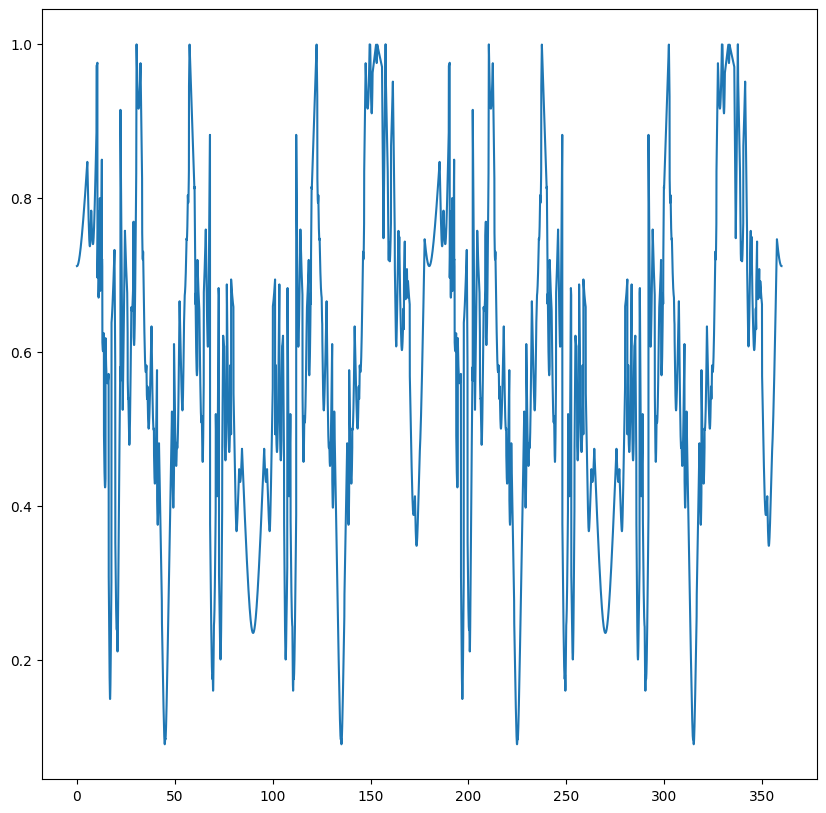

In [250]:
xsr = (xs*math.pi)/180
plt.plot(xs, ys)
plt.show()

In [93]:
analisis=np.r_[True, ys[1:] < ys[:-1]] & np.r_[ys[:-1:] < ys[1:], True]
for i in range(len(analisis)):
    if analisis[i]==True:
        print(xs[i],":",ys[i])

14.38 : 0.42410672261770666
16.92 : 0.14921454135007353
20.34 : 0.23901258172433504
20.73 : 0.2109629129320743
26.77 : 0.47937640610785237
39.2 : 0.49878970415759016
39.81 : 0.4289978387099147
41.27 : 0.3755238456138329
44.86 : 0.09040360491526969
45.18 : 0.09667218490998303
49.23 : 0.3977824172465477
50.7 : 0.451963648302512
51.27 : 0.47503387141438214
64.24 : 0.4572284292401478
69.22 : 0.17497354530956208
69.56 : 0.16001828799677648
71.64 : 0.41256615345380465
73.36 : 0.20052692384990645
75.85 : 0.4591811752937073
77.8 : 0.47001134345070894
78.76 : 0.49310501937319096
81.55 : 0.3671888744099761
83.38 : 0.431119026181495
90.0 : 0.23500585974795085
96.62 : 0.4311190261814946
98.45 : 0.36718887440997733
101.24 : 0.4931050193731897
102.2 : 0.4700113434507101
104.15 : 0.4591811752937076
106.64 : 0.20052692384990528
108.36 : 0.4125661534538054
110.44 : 0.1600182879967772
110.78 : 0.1749735453095621
115.76 : 0.4572284292401483
128.73 : 0.4750338714143827
129.3 : 0.45196364830251223
130.77 :

In [224]:
res,minD=busca((Aa,Ab),(Ba,Bb), -90, rango=50, limDelta=0.4)

>-90°:(0,-1)-(1,0): Delta=105.80517672189053% : 0.2221118729999998
>>-90°:(0,1)-(-1,0): Delta=105.80517672189053% : 0.2221118729999998
----------
-90°:0.23500585974795085
	delta1=0.23500585974795085
	delta2=0.23500585974795085
----------


In [225]:
P=dameP(res,90)
P

(1, 0, 0, 1)

In [232]:
su,sv=transfVs(Aa,Ab,(1,2,-1,2))
cAng(su,sv)

90.5000851344913

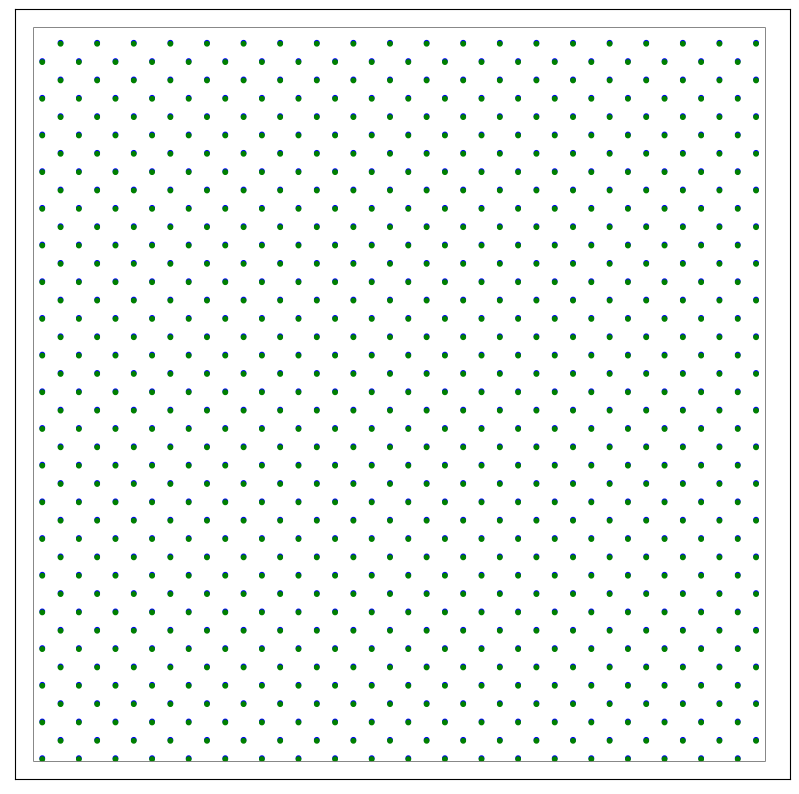

1

In [246]:
sm0 = superMesh(multV(20,Aa),multV(20,Ab),[gcA])
sm0.showNM(1,1,name='GeCeAlfa(90)original.png')

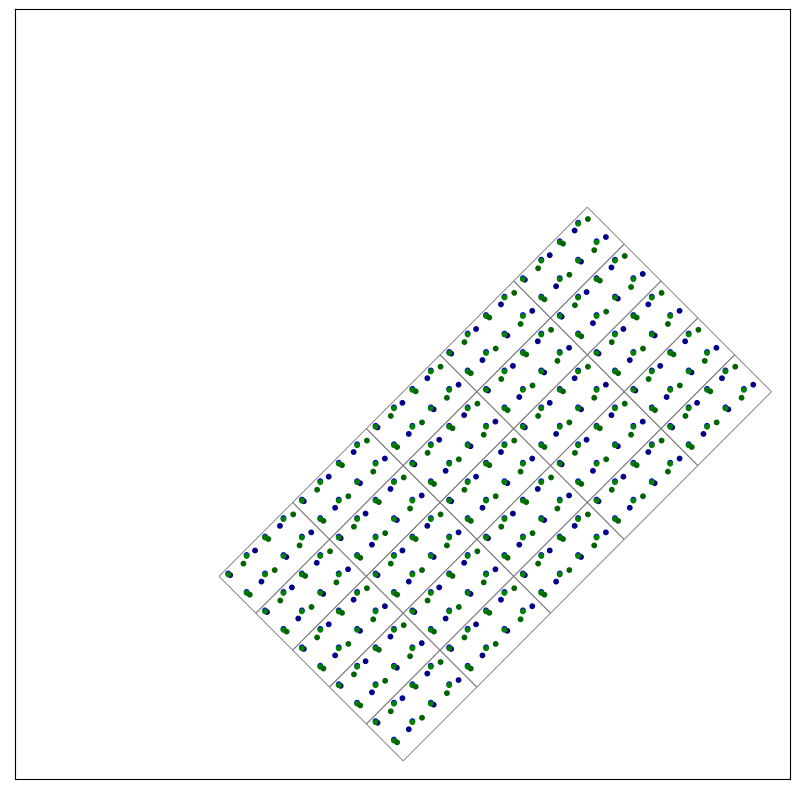

1

In [234]:
sm1 = superMesh(su,sv,[gcA,gcr])
sm1.showNM(5,5,name='GeCeAlfa-Beta(44.86).png')
sm1.exporta(name='GeCe-Alfa-Beta(44.86)')

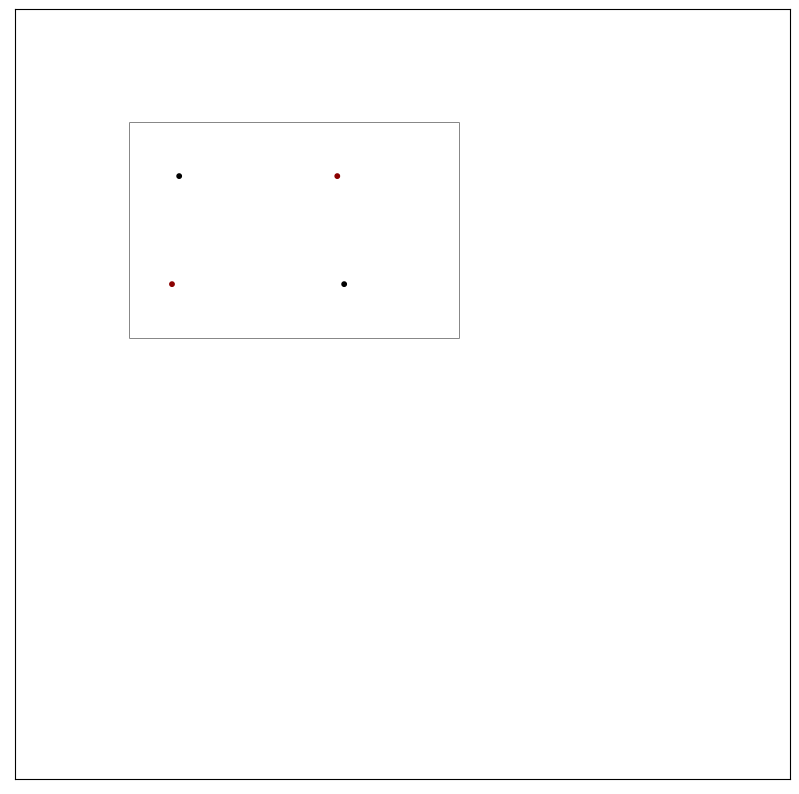

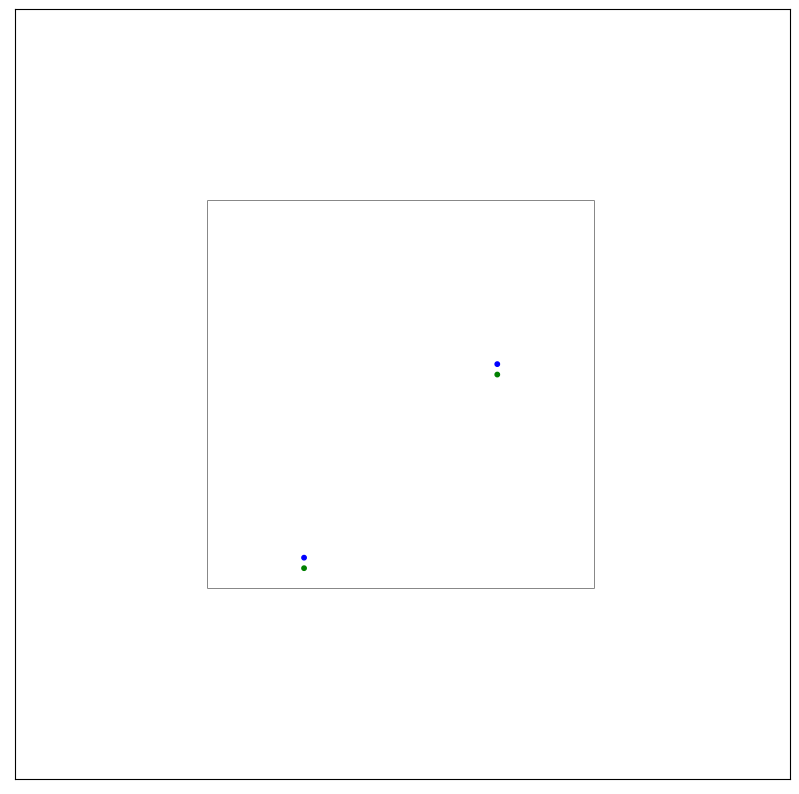

1

In [244]:
gcr=gcB.mRot(90)
gcr.showNM(1,1)
gcA.showNM(1,1)


In [114]:
cAng(su,sv)

90.5000851344913

In [122]:
sm1.exporta(name='GeCe alfa-beta(44.86°)')

1

In [2]:
vec1 = (2.4,0)
vec2 = rota(vec1,108)

In [63]:
ats=[Atomo((1/3,2/3),posZ=0.1,color='blue',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='blue',sig='C2')]
cosa = Malla(vec1,vec2,atms=ats,name='Cosa')
ats=[Atomo((1/3,2/3),posZ=0.1,color='black',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='black',sig='C2')]
cosa2 = Malla(rota(vec1,54),rota(vec2,54),atms=ats,name='Cosa2')
print(cosa2)

Cosa2
1.0
        2.4000000000         0.0000000000         0.0000000000
        -0.7416407865         2.2825356391         0.0000000000
        0.0000000000         0.0000000000         10.0000000000
	C1	C2
	1	1
Direct
     0.3333333333         0.6666666667         0.1000000000
     0.6666666667         0.3333333333         0.1000000000


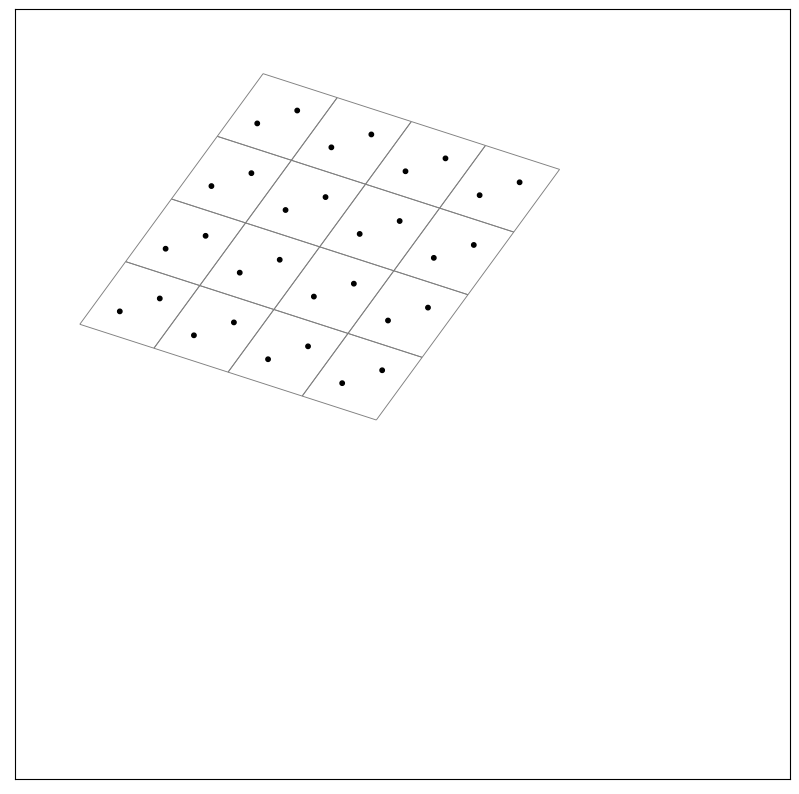

1

In [15]:
cosa2.showNM(4,4)

In [16]:
multV(10,vec1),multV(10,vec2)
(u1,u2), (v1,v2) = cosa2.u, cosa2.v
(p1,p2), (q1,q2) = multV(10,vec1),multV(10,vec2)
np1 = ((p2*v1)-(p1*v2))/((u2*v1)-(u1*v2))
np1

3.2491969623290635

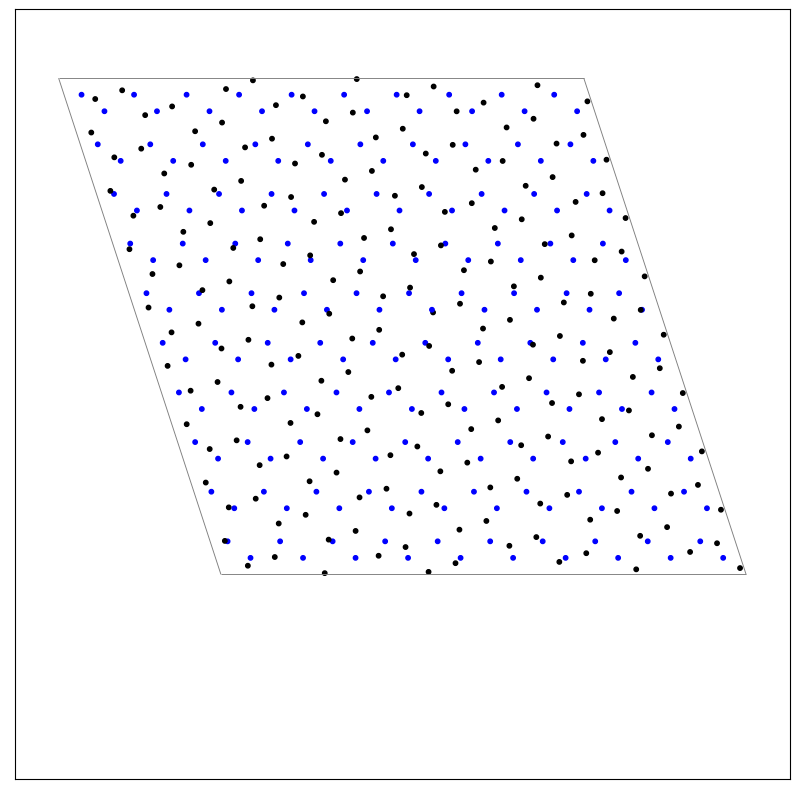

1

In [18]:
sCosa = superMesh(multV(10,vec1),multV(10,vec2),[cosa,cosa2])
sCosa.showNM(1,1)

In [48]:
res,minD=busca((vec1,vec2),(vec1,vec2), 54, rango=7, limDelta=5)

>54°:(1,0)-(0,-1): Delta=99.99999999999997% : 0.7508854321931083
>>54°:(1,2)-(2,1): Delta=100.00000000000003% : 0.38259523735701206
>>54°:(1,3)-(3,2): Delta=93.63099746070034% : 0.6857916908789154
>54°:(0,-5)-(-4,-4): Delta=106.33135104400499% : 0.7145231559845162
>>54°:(0,5)-(4,4): Delta=106.33135104400499% : 0.7145231559845162
>54°:(1,-4)-(-3,-4): Delta=105.23325305738334% : 0.5780630305528162
>>54°:(1,4)-(4,3): Delta=90.89648365289389% : 1.072075274816514
>54°:(2,-3)-(-2,-4): Delta=105.34501816611395% : 0.7161525103703757
>>54°:(2,3)-(3,1): Delta=106.80223719924898% : 0.685791690878915
>54°:(3,-2)-(-1,-4): Delta=107.24177664917012% : 1.0230816159484653
>>54°:(4,1)-(2,-3): Delta=93.2472429351289% : 1.023081615948467
>54°:(5,0)-(2,-4): Delta=100.11164286401963% : 0.9179998818621196
>54°:(0,-6)-(-5,-5): Delta=102.07809700224479% : 0.2931539449806434
>>54°:(0,6)-(5,5): Delta=102.07809700224479% : 0.2931539449806434
>54°:(1,-5)-(-4,-5): Delta=100.7840430375897% : 0.3439152084850706
>>54°

In [155]:
P=dameP(res,54)

(0, -6) (1, 2) det= 6
(0, -6) (4, 3) det= 24
(0, -6) (7, 1) det= 42
(0, -6) (1, 8) det= 6
(0, -6) (5, 4) det= 30
(0, -6) (1, 9) det= 6
(0, -6) (5, 5) det= 30
(0, -6) (6, 5) det= 36
(0, -6) (6, 6) det= 36
(0, -6) (10, 2) det= 60
(0, -6) (6, 7) det= 36
(0, -6) (10, 3) det= 60
(0, -6) (4, 10) det= 24
(0, -6) (7, 7) det= 42
(0, -6) (11, 3) det= 66
(0, -6) (13, 1) det= 78
(0, -6) (1, 14) det= 6
(0, -6) (7, 8) det= 42
(0, -6) (11, 4) det= 66
(0, -6) (1, 15) det= 6
(0, -6) (5, 11) det= 30
(0, -6) (11, 5) det= 66
(0, -6) (5, 12) det= 30
(0, -6) (12, 5) det= 72
(0, -6) (6, 12) det= 36
(0, -6) (12, 6) det= 72
(0, -6) (6, 13) det= 36
(0, -6) (10, 9) det= 60
(0, -6) (6, 14) det= 36
(0, -6) (10, 10) det= 60
(0, -6) (13, 7) det= 78
(0, -6) (7, 14) det= 42
(0, -6) (11, 10) det= 66
(0, -6) (7, 15) det= 42
(0, -6) (11, 11) det= 66
(0, -6) (11, 12) det= 66
(0, -6) (12, 12) det= 72
(0, -6) (12, 13) det= 72
(0, -6) (13, 14) det= 78
(1, -5) (1, 2) det= 7
(1, -5) (0, 6) det= 6
(1, -5) (0, 7) det= 7
(1, -5) 

In [51]:
su,sv=transfVs(vec1,vec2,(4,4,-4,6))
cAng(su,sv)

105.39097247869668

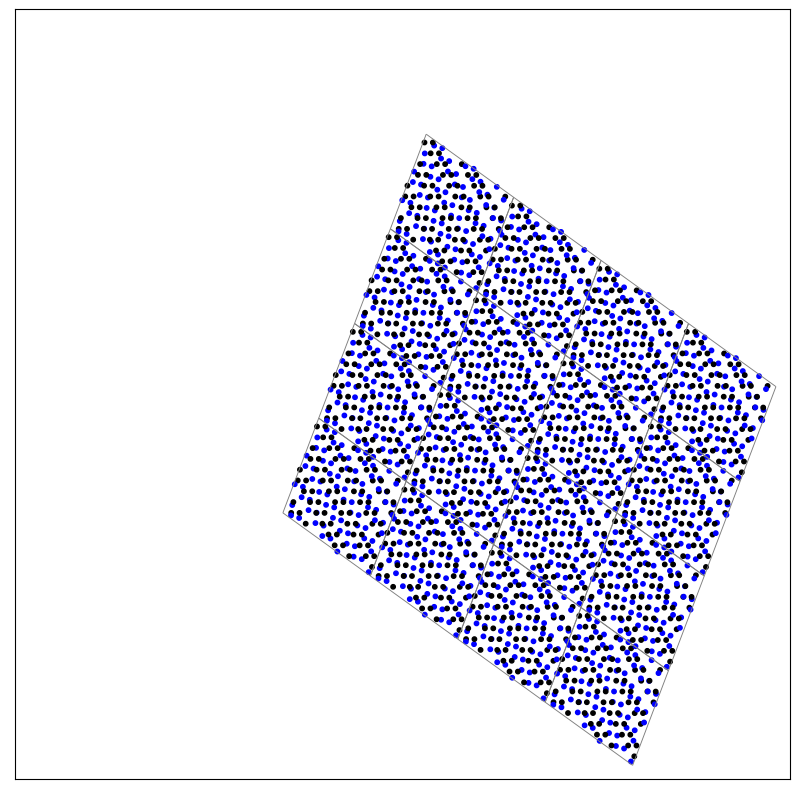

1

In [53]:
su,sv=transfVs(vec1,vec2,(4,4,-4,6))
sCosa = superMesh(su,sv,[cosa,cosa2])
sCosa.showNM(4,4)
sCosa.exporta(name='prueba')

In [35]:
sv1 = m2V(vec1,vec2,(4,-4))
sv2 = rota(sv1,108)
(sv1,sv2)

((12.566563145999494, -9.130142556433475),
 (4.8000000000000025, 14.772880978441215))

In [54]:
u,v=vec1,vec2
ru,rv = rota(vec1,54), rota(vec2,54)
print("Vectores en Capa 1:\n\t",m2V(u,v,(4,-4)))
print("Vectores en Capa 2:\n\t",m2V(ru,rv,(-2,-7)))
print("Diferencia en resultados:\n\t",dist(m2V(u,v,(4,-4)),m2V(ru,rv,(-2,-7))))
#dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1)))

Vectores en Capa 1:
	 (12.566563145999494, -9.130142556433475)
Vectores en Capa 2:
	 (13.156380262754709, -9.074767078498866)
Diferencia en resultados:
	 0.5924109002828372


In [55]:
#Calculamos el alfa
(x,y) = sv1
alfaX, alfaY = sv2
print("x = {:.4f}\ny = {:.4f}".format(x,y))
print("x' = {:.4f}\ny' = {:.4f}".format(alfaX, alfaY))
cAng((x,y), (alfaX, alfaY))

x = 12.5666
y = -9.1301
x' = 4.8000
y' = 14.7729


108.0

In [56]:
#Redimencionamos los vectores generadores de ambas capas con los que obtuvimos. 
cosa.u, cosa.v = transfVs((x,y), (alfaX, alfaY),(3/20,-1/10,1/10,1/10))
cosa2.u, cosa2.v = transfVs((x,y), (alfaX, alfaY),(1/19,-3/19,7/38,-1/19))
#Actualizando valores
ru,rv=cosa2.u,cosa2.v
u,v=cosa.u,cosa.v
(a1,a2),(b1,b2) = cosa.u,cosa.v
print("a  = ({:.4f} , {:.4f})\nb  = ({:.4f},{:.4f})".format(a1,a2,b1,b2))
(a1,a2),(b1,b2) = cosa2.u,cosa2.v
print("a' = ({:.4f} , {:.4f})\nb' = ({:.4f},{:.4f})".format(a1,a2,b1,b2))

a  = (2.3650 , 0.1078)
b  = (-0.7767,2.3903)
a' = (1.5456 , 2.2408)
b' = (-2.2368,0.6641)


In [57]:
(vec1,vec2)

((2.4, 0), (-0.7416407864998736, 2.2825356391083687))

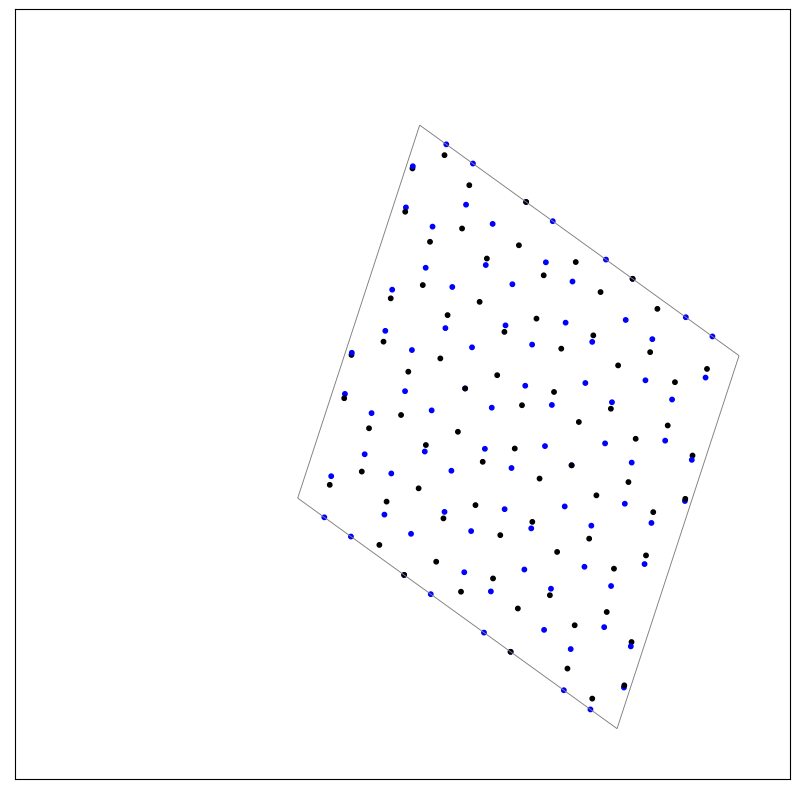

1

In [58]:
su,sv=transfVs(u,v,(4,4,-4,6))
sCosa = superMesh(su,sv,[cosa,cosa2])
sCosa.showNM(1,1)
sCosa.exporta(name='cosas')

In [37]:
m2V(vec1,vec2,(4,6))

(5.150155281000758, 13.695213834650211)

In [38]:
dist(m2V(vec1,vec2,(4,-4)),(0,0))

15.53312629199899

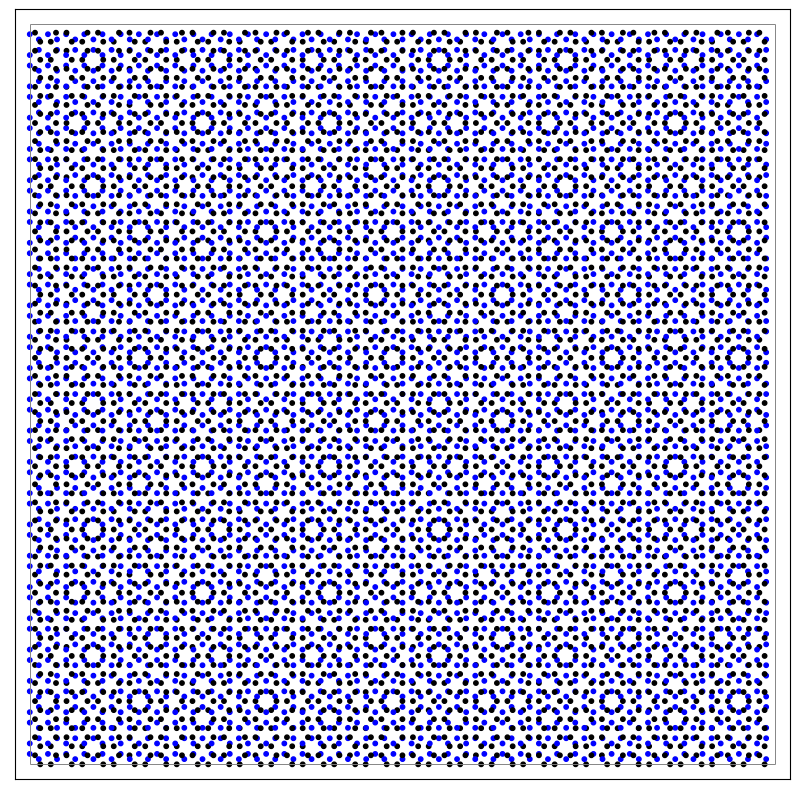

1

In [166]:
sep = 30
vec1 = (2.44,0.0)
vec2 = rota(vec1,sep*4)
'''
ats=[Atomo((1/3,2/3),posZ=0.1,color='blue',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='blue',sig='C2'),
     Atomo((1/3,1/3),posZ=0.1,color='darkred',sig='C1'),
     Atomo((2/3,2/3),posZ=0.1,color='darkred',sig='C2')]
cosa = Malla(vec1,vec2,atms=ats,name='Cosa')
ats=[Atomo((1/3,2/3),posZ=0.1,color='black',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='black',sig='C2'),
     Atomo((1/3,1/3),posZ=0.1,color='grey',sig='C1'),
     Atomo((2/3,2/3),posZ=0.1,color='grey',sig='C2')]
cosa2 = Malla(vec1,vec2,atms=ats,name='Cosa2')

'''
ats=[Atomo((1/3,2/3),posZ=0.1,color='blue',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='blue',sig='C2')]
cosa = Malla(vec1,vec2,atms=ats,name='Cosa')
ats=[Atomo((1/3,2/3),posZ=0.1,color='black',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='black',sig='C2')]
cosa2 = Malla(vec1,vec2,atms=ats,name='Cosa2')
cosa2=cosa2.mRot(-sep)

sCosa = superMesh((100,0),(0,100),[cosa,cosa2])
sCosa.showNM(1,1)
#sCosa.exporta(name='algo')

In [189]:
res,minD=busca((vec1,vec2),(vec1,vec2), -30, rango=16, limDelta=0.1)
print(res[0][1][0],"-> Estres:{}%".format((res[0][1][2]-1)*100))

>-30°:(4,-11)-(11,-4): Delta=99.99999999999997% : 0.09068197234191475
>-30°:(11,-4)-(15,4): Delta=100.00000000000003% : 0.09068197234190639
>>-30°:(4,15)-(-4,11): Delta=100.0% : 0.09068197234190033
>>-30°:(15,4)-(15,11): Delta=100.00000000000003% : 0.09068197234190732
>>-30°:(11,15)-(4,15): Delta=100.00000000000003% : 0.09068197234191235
>>-30°:(15,11)-(11,15): Delta=100.00000000000003% : 0.0906819723419047
>-30°:(15,-15)-(26,0): Delta=99.92600812897369% : 0.04694044297909358
----------
-30°:0.06879384160448282
	delta1=0.04690571086706531
	delta2=0.09068197234190033
----------
[11, -4] -> Estres:2.220446049250313e-14%


In [190]:
cosa2 = Malla(multV(res[0][1][2],vec1),multV(res[0][1][2],vec2),atms=ats,name='Cosa2')
cosa2=cosa2.mRot(-sep)
print(cosa2.u,cosa2.v)

(2.1131019852340307, -1.22) (2.220446049250313e-16, 2.4400000000000004)


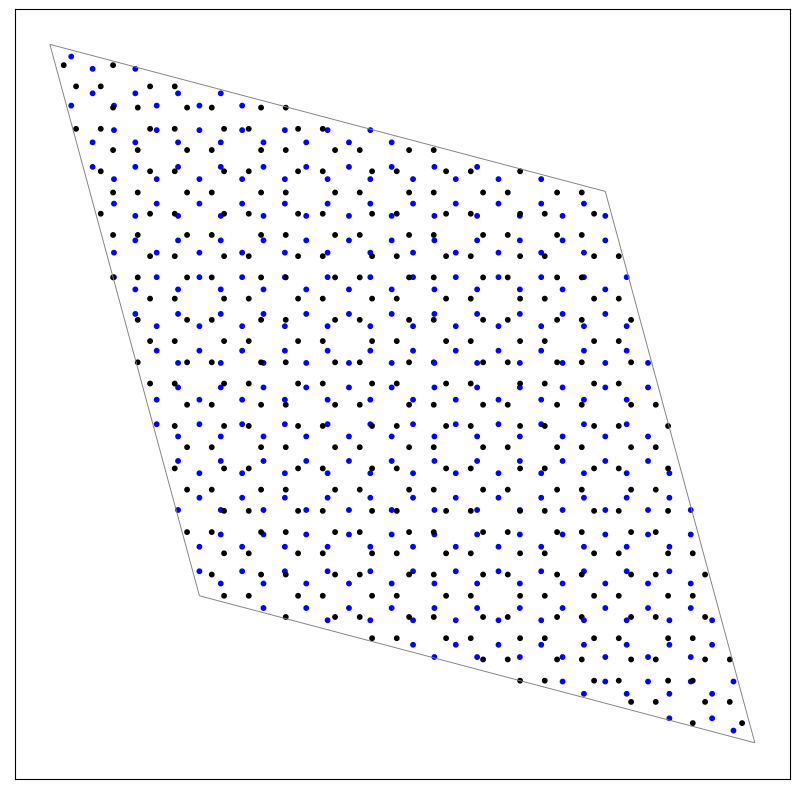

1

In [191]:
su,sv=transfVs(vec1,vec2,(11,4,-4,15))
sCosa = superMesh(su,sv,[cosa,cosa2])
sCosa.showNM(1,1)
sCosa.exporta(name='30°Grande')

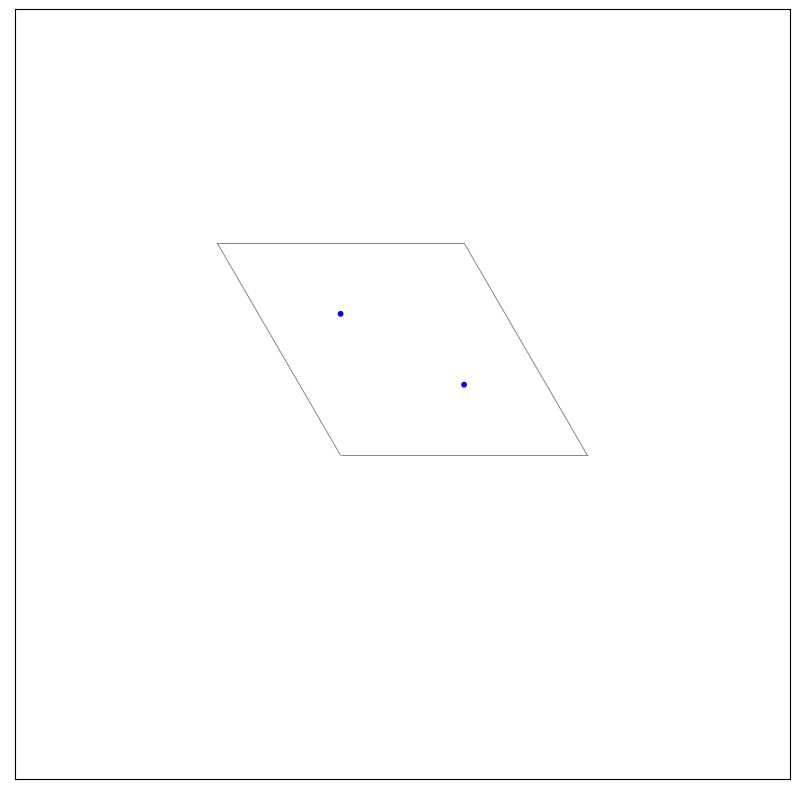

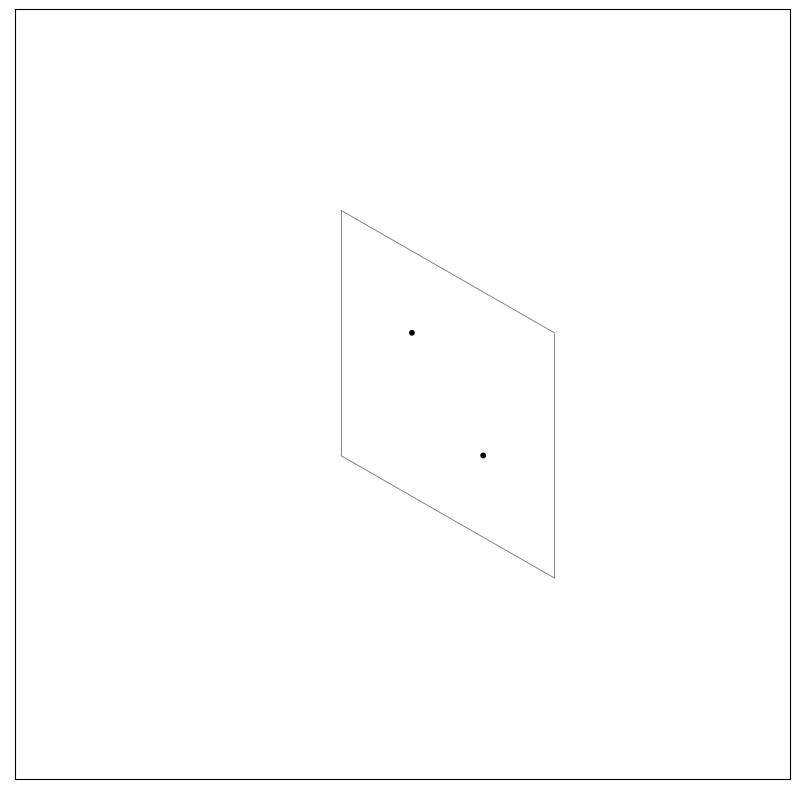

1

In [192]:
su,sv=vec1,vec2
sCosa = superMesh(su,sv,[cosa])
sCosa.showNM(1,1)
sCosa.exporta(name='Capa1')

su,sv=cosa2.u, cosa2.v
sCosa = superMesh(su,sv,[cosa2])
sCosa.showNM(1,1)
sCosa.exporta(name='Capa2')